# Auto MPG

(INFORMACIÓN DEL DATASET):
El dataset de Auto MPG, se centra en el consumo de combustible de los vehículos en ciudad. El dataset cuenta con 398 instancias, 7 características, 1 Target y el dataset cuenta con datos nulos.

Se mencionaron, 7 caracteristicas pero se visualizan 9. En este caso, algunas de las variables las cuales no pueden llegar a tener mucha relevancia vendrian siendo el modelo del año y el nombre del automóvil.
 * displacement: Característica continua que representa el desplazamiento o tamaño del motor.
 * mpg: Característica continua que representa las millas por galón, que es la variable objetivo.
 * cylinders: Característica de enteros que representa el número de cilindros.
 * horsepower: Característica continua que representa la potencia del motor.
 * weight: Característica continua que representa el peso del vehículo.
 * acceleration: Característica continua que representa la aceleración del vehículo.
 * model_year: Característica de enteros que representa el año del modelo del vehículo.
 * origin: Característica de enteros que representa el origen o fabricante del vehículo.
 * car_name: Identificador único de cada instancia que representa el nombre del automóvil.


 Revisando el Dataset, teniendo en cuentas las caracteristicas, se puede hacer un regresor lineal enfocado a lo que seria poder predecir la cantidad de millas que puede realizar por galon, ya que se tiene la cantidad de cilindros que tiene el motor, los caballos del motor, el peso de este y la aceleración.

[Dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg)

---



Se hace un pip  install de la libreria ucimlrepo, que es donde se encuentran los datasets para no tener que descargarlo y posiblemente modificar columnas, cabe aclarar que es necesario usar el !pip ya que es un comando de terminal

In [ ]:
!pip install ucimlrepo

### Importación de librerias y visualización del dataset

Se importan las librerias necesarias para poder hacer el analisis exploratorio de los datos y ademas para hacer la visualización

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer

Se traen todos los datos de la libreria, y se le pasa a valores de X y de y, para poder asi tener separado lo que seria las caracteristicas con el target

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Visualizar la información del dataset con respecto a sus características (X) y a su objetivo (Y) para revisar el tipo de los datos, el nombre de las variables y verificar si presentan datos nulos

In [ ]:
X.info()
print("-"*100)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
X

displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
393       1  
394       2  
395       1  
396       1  
397       1  

[398 rows x 7 columns]

In [ ]:
y

mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]

En el dataset en el momento de hacer un analisis principal de los datos se observa de que hay valores faltantes de una sola caracteristica.
Los datos faltantes vienen de la variable horsepower, y son solo 6 datos, por lo cual no afecta mucho al tamaño del dataset por lo que se se van a eliminar las filas las cuales tengan estos valores faltantes

Se concatenan los dos datasets para poder eliminar solo una vez los datos faltantes, despues se vuelven a separar

In [ ]:
df = pd.concat([X,y], axis=1)

In [ ]:
df.isnull().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin   mpg  
0         1  18.0  
1         1  15.0  
2         1  18.0  
3         1  16.0  
4         1  17.0  
..      ...   ...  
393       1  27.0  
394       2  44.0  
395       1  32.0  
396       1  28.0  
397       1  31.0  

[392 rows x 8 columns]

In [ ]:
df.describe().round(2).transpose()[['count','mean','std','min','max']]

count     mean     std     min     max
displacement  392.0   194.41  104.64    68.0   455.0
cylinders     392.0     5.47    1.71     3.0     8.0
horsepower    392.0   104.47   38.49    46.0   230.0
weight        392.0  2977.58  849.40  1613.0  5140.0
acceleration  392.0    15.54    2.76     8.0    24.8
model_year    392.0    75.98    3.68    70.0    82.0
origin        392.0     1.58    0.81     1.0     3.0
mpg           392.0    23.45    7.81     9.0    46.6

In [ ]:
# @title Modificación del dataset separando el target y sin "origin"
X_modified = df.drop(['origin', 'mpg'], axis=1)
y = df['mpg']

In [ ]:
X_modified

displacement  cylinders  horsepower  weight  acceleration  model_year
0           307.0          8       130.0    3504          12.0          70
1           350.0          8       165.0    3693          11.5          70
2           318.0          8       150.0    3436          11.0          70
3           304.0          8       150.0    3433          12.0          70
4           302.0          8       140.0    3449          10.5          70
..            ...        ...         ...     ...           ...         ...
393         140.0          4        86.0    2790          15.6          82
394          97.0          4        52.0    2130          24.6          82
395         135.0          4        84.0    2295          11.6          82
396         120.0          4        79.0    2625          18.6          82
397         119.0          4        82.0    2720          19.4          82

[392 rows x 6 columns]

In [ ]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [ ]:
# @title Visualización sin la característica "Horsepower"
XwithoutHorsePower = df.drop(['horsepower','origin', 'mpg'], axis=1)
ywithoutHorsePower = df['mpg']
XwithoutHorsePower

displacement  cylinders  weight  acceleration  model_year
0           307.0          8    3504          12.0          70
1           350.0          8    3693          11.5          70
2           318.0          8    3436          11.0          70
3           304.0          8    3433          12.0          70
4           302.0          8    3449          10.5          70
..            ...        ...     ...           ...         ...
393         140.0          4    2790          15.6          82
394          97.0          4    2130          24.6          82
395         135.0          4    2295          11.6          82
396         120.0          4    2625          18.6          82
397         119.0          4    2720          19.4          82

[392 rows x 5 columns]

In [ ]:
ywithoutHorsePower

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [ ]:
XwithoutHorsePower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   weight        392 non-null    int64  
 3   acceleration  392 non-null    float64
 4   model_year    392 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.4 KB


### Normalización de las variables y visualización de la normalización

In [ ]:
# Función para normalizar los valores
def normalizar(x, xmax, xmin, ymax, ymin):  # El ymax y ymin son los valores que quiero que queden normalizados (ymax = 1) (ymin = 0)
  m = (ymax-ymin)/(xmax-xmin) # Pendiente
  b = ymin - m*xmin # Tengo elección, si escojo el ymax debo elegir xmax

  y = m*x + b

  return y

In [ ]:
max_vals = np.max(df, axis=0)
min_vals = np.min(df, axis=0)

print(df.columns)
print(min_vals)
print("-"*100)
print(max_vals)

# Ahora puedes utilizar los valores máximo y mínimo para normalizar tu DataFrame
X_norm = normalizar(df, max_vals, min_vals, 1, 0)
X_norm.head()

Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')
displacement      68.0
cylinders          3.0
horsepower        46.0
weight          1613.0
acceleration       8.0
model_year        70.0
origin             1.0
mpg                9.0
dtype: float64
----------------------------------------------------------------------------------------------------
displacement     455.0
cylinders          8.0
horsepower       230.0
weight          5140.0
acceleration      24.8
model_year        82.0
origin             3.0
mpg               46.6
dtype: float64


displacement  cylinders  horsepower    weight  acceleration  model_year  \
0      0.617571        1.0    0.456522  0.536150      0.238095         0.0   
1      0.728682        1.0    0.646739  0.589736      0.208333         0.0   
2      0.645995        1.0    0.565217  0.516870      0.178571         0.0   
3      0.609819        1.0    0.565217  0.516019      0.238095         0.0   
4      0.604651        1.0    0.510870  0.520556      0.148810         0.0   

   origin       mpg  
0     0.0  0.239362  
1     0.0  0.159574  
2     0.0  0.239362  
3     0.0  0.186170  
4     0.0  0.212766

In [ ]:
X_norm.describe().round(2).transpose()[['count','mean','std','min','max']]

count  mean   std  min  max
displacement  392.0  0.33  0.27  0.0  1.0
cylinders     392.0  0.49  0.34  0.0  1.0
horsepower    392.0  0.32  0.21  0.0  1.0
weight        392.0  0.39  0.24  0.0  1.0
acceleration  392.0  0.45  0.16  0.0  1.0
model_year    392.0  0.50  0.31  0.0  1.0
origin        392.0  0.29  0.40  0.0  1.0
mpg           392.0  0.38  0.21  0.0  1.0

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'displacement'),
  Text(1, 0, 'cylinders'),
  Text(2, 0, 'horsepower'),
  Text(3, 0, 'weight'),
  Text(4, 0, 'acceleration'),
  Text(5, 0, 'model_year'),
  Text(6, 0, 'origin'),
  Text(7, 0, 'mpg')])

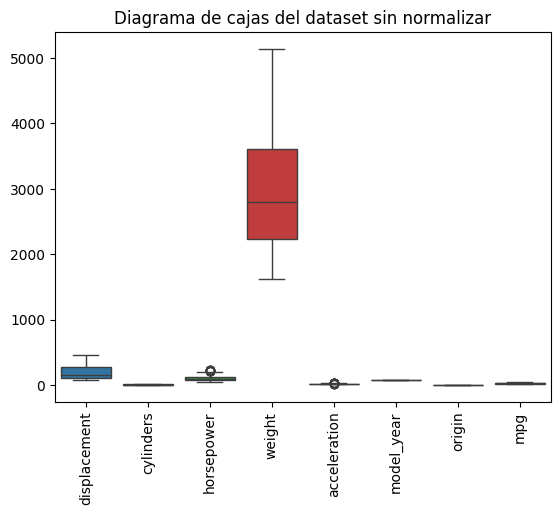

In [ ]:
sns.boxplot(df)
plt.title("Diagrama de cajas del dataset sin normalizar")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'displacement'),
  Text(1, 0, 'cylinders'),
  Text(2, 0, 'horsepower'),
  Text(3, 0, 'weight'),
  Text(4, 0, 'acceleration'),
  Text(5, 0, 'model_year'),
  Text(6, 0, 'origin'),
  Text(7, 0, 'mpg')])

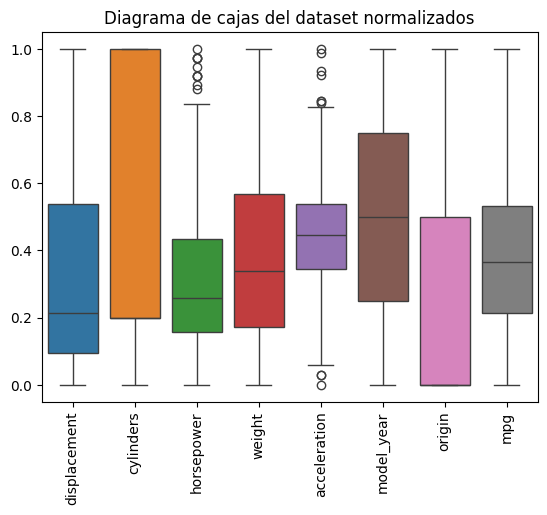

In [ ]:
sns.boxplot(X_norm)
plt.title("Diagrama de cajas del dataset normalizados")
plt.xticks(rotation=90)

In [ ]:
X_modified = X_norm.drop(['origin', 'mpg'], axis=1)
y = df['mpg']

In [ ]:
X_modified

displacement  cylinders  horsepower    weight  acceleration  model_year
0        0.617571        1.0    0.456522  0.536150      0.238095         0.0
1        0.728682        1.0    0.646739  0.589736      0.208333         0.0
2        0.645995        1.0    0.565217  0.516870      0.178571         0.0
3        0.609819        1.0    0.565217  0.516019      0.238095         0.0
4        0.604651        1.0    0.510870  0.520556      0.148810         0.0
..            ...        ...         ...       ...           ...         ...
393      0.186047        0.2    0.217391  0.333711      0.452381         1.0
394      0.074935        0.2    0.032609  0.146583      0.988095         1.0
395      0.173127        0.2    0.206522  0.193365      0.214286         1.0
396      0.134367        0.2    0.179348  0.286929      0.630952         1.0
397      0.131783        0.2    0.195652  0.313864      0.678571         1.0

[392 rows x 6 columns]

### Visualización y comparativas

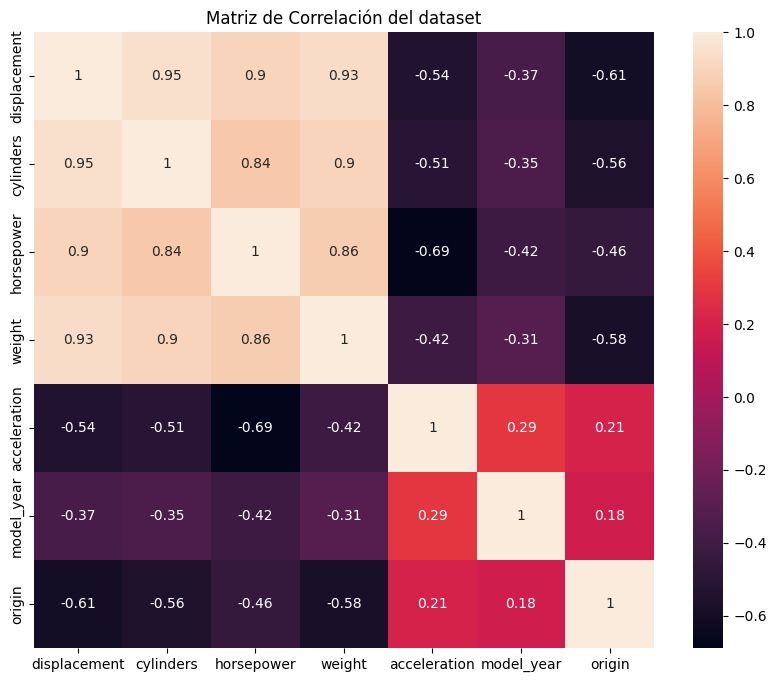

In [ ]:
# @title Matriz de Correlación Normal
correlationNormal = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlationNormal, annot=True)
plt.title("Matriz de Correlación del dataset")
plt.savefig("matriz_correlacion_Normal.jpg")

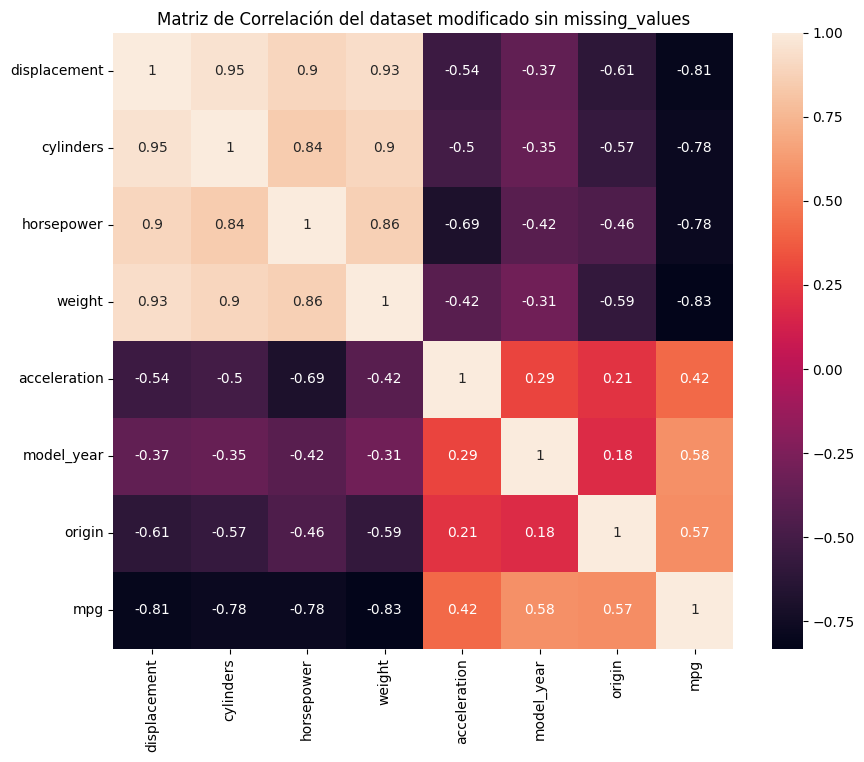

In [ ]:
# @title Matriz de Correlación sin los valores faltantes
correlationWithoutMissing = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlationWithoutMissing, annot=True)
plt.title("Matriz de Correlación del dataset modificado sin missing_values")
plt.savefig("matriz_correlacion_sin_missingvalues.jpg")

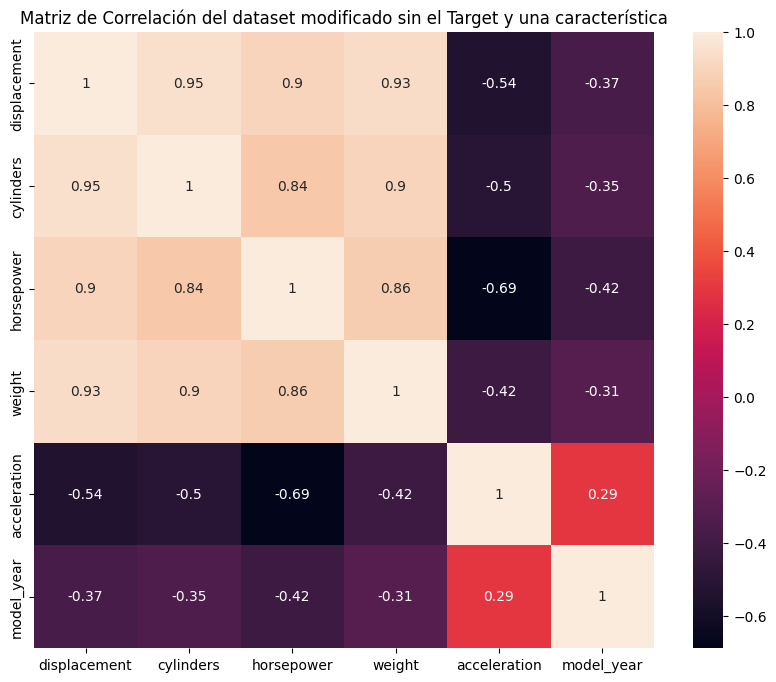

In [ ]:
# @title Matriz de Correlación sin el Target y 1 característica
correlationWithoutTarget = X_modified.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlationWithoutTarget, annot=True)
plt.title("Matriz de Correlación del dataset modificado sin el Target y una característica")
plt.savefig("matriz_correlacion_sin_exit.jpg")

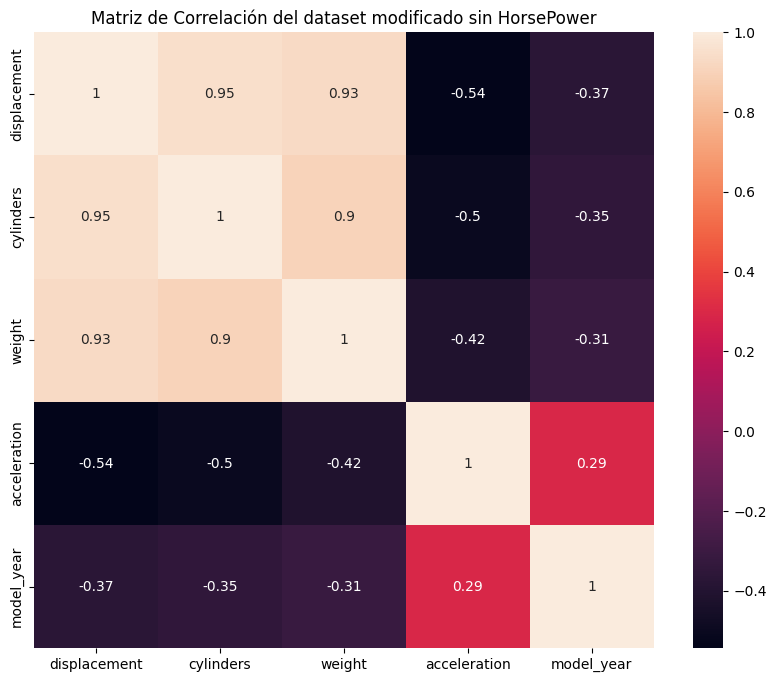

In [ ]:
# @title Matriz de Correlación sin la caractrística de datos nulos
correlationWithoutHorsePower = XwithoutHorsePower.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationWithoutHorsePower, annot=True)
plt.title("Matriz de Correlación del dataset modificado sin HorsePower")
plt.savefig("matriz_correlacion_sin_horsepower.jpg")

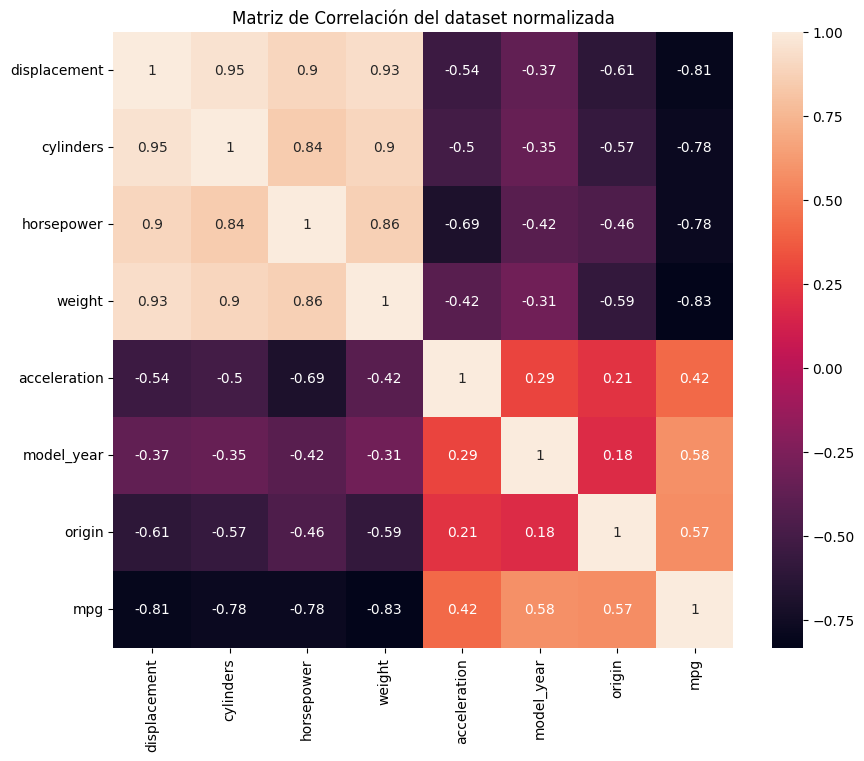

In [ ]:
# @title Matriz de Correlación normalizada
correlationwithNormData = X_norm.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationwithNormData, annot=True)
plt.title("Matriz de Correlación del dataset normalizada")
plt.savefig("matriz_correlacion_norm.jpg")

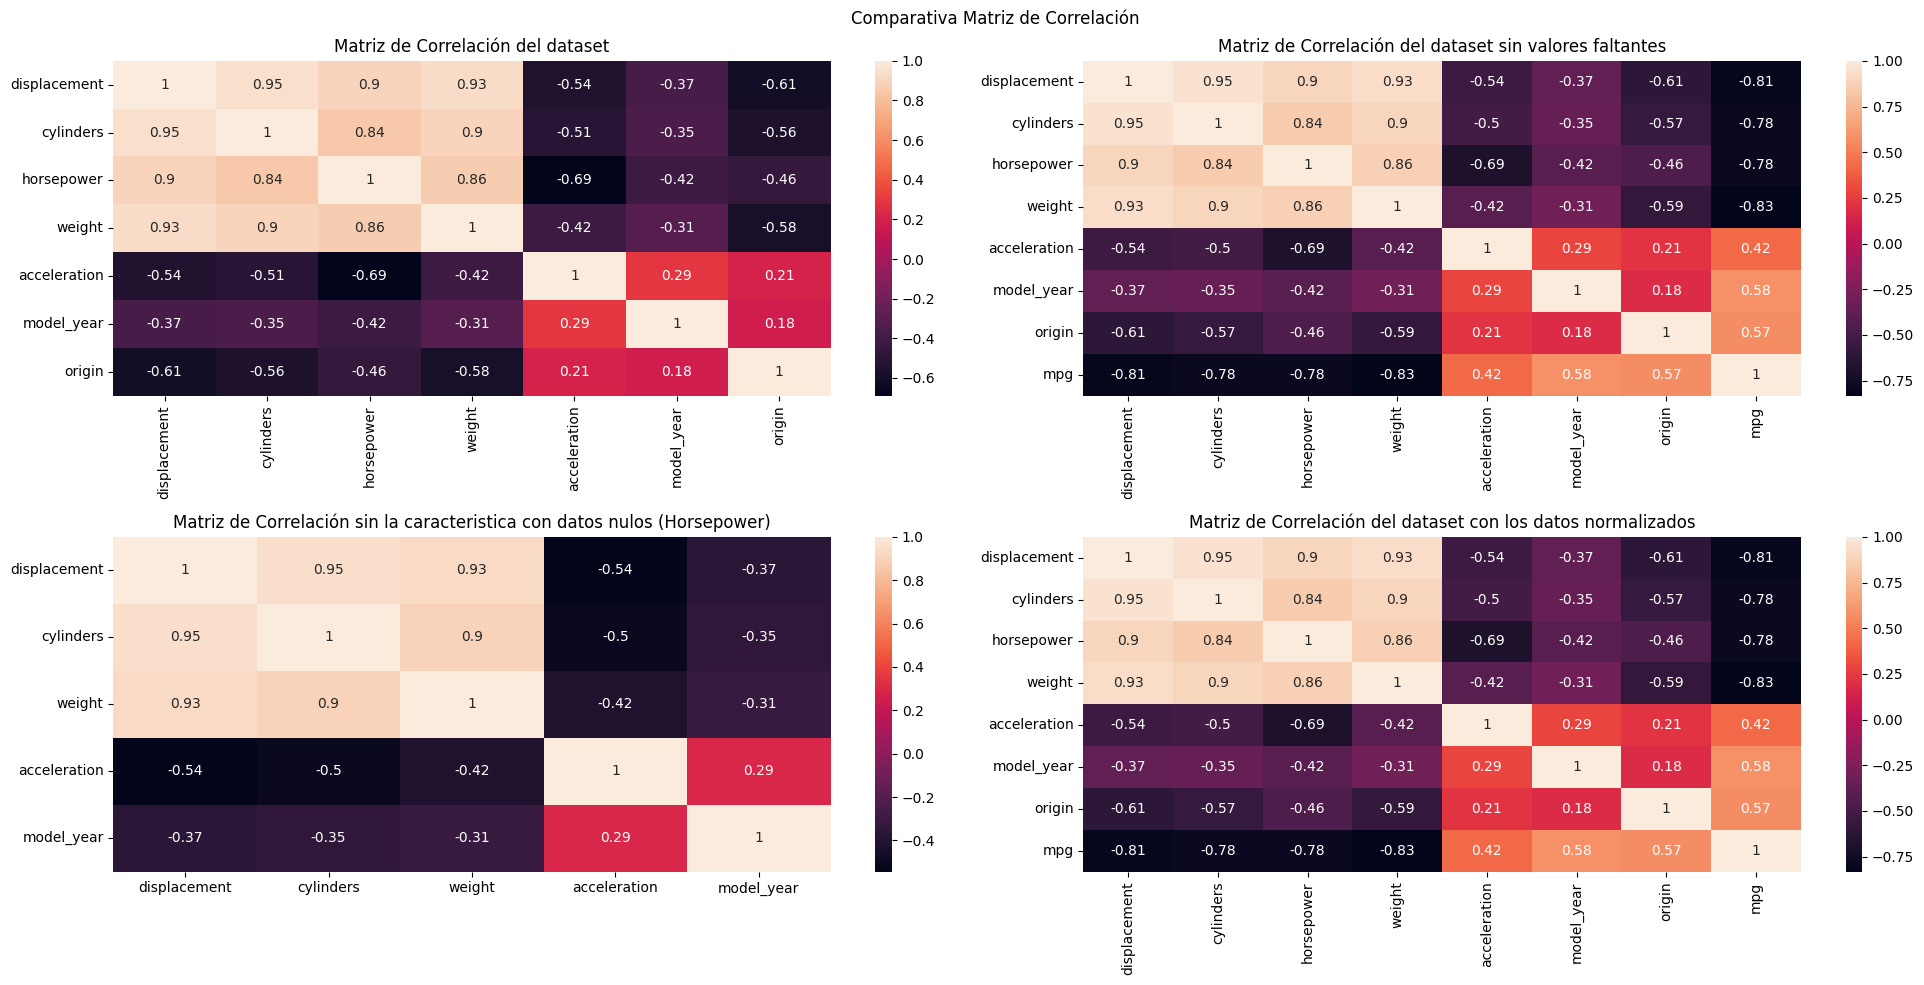

In [ ]:
# @title Comparativa de las 4 matrices de Correlación
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle("Comparativa Matriz de Correlación")

a = sns.heatmap(correlationNormal, annot=True, ax=axs[0,0])
axs[0,0].set_title("Matriz de Correlación del dataset")

b = sns.heatmap(correlationWithoutMissing, annot=True, ax=axs[0,1])
axs[0,1].set_title("Matriz de Correlación del dataset sin valores faltantes")

c = sns.heatmap(correlationWithoutHorsePower, annot=True, ax=axs[1,0])
axs[1,0].set_title("Matriz de Correlación sin la caracteristica con datos nulos (Horsepower)")

c = sns.heatmap(correlationwithNormData, annot=True, ax=axs[1,1])
axs[1,1].set_title("Matriz de Correlación del dataset con los datos normalizados")

# Ajustar espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

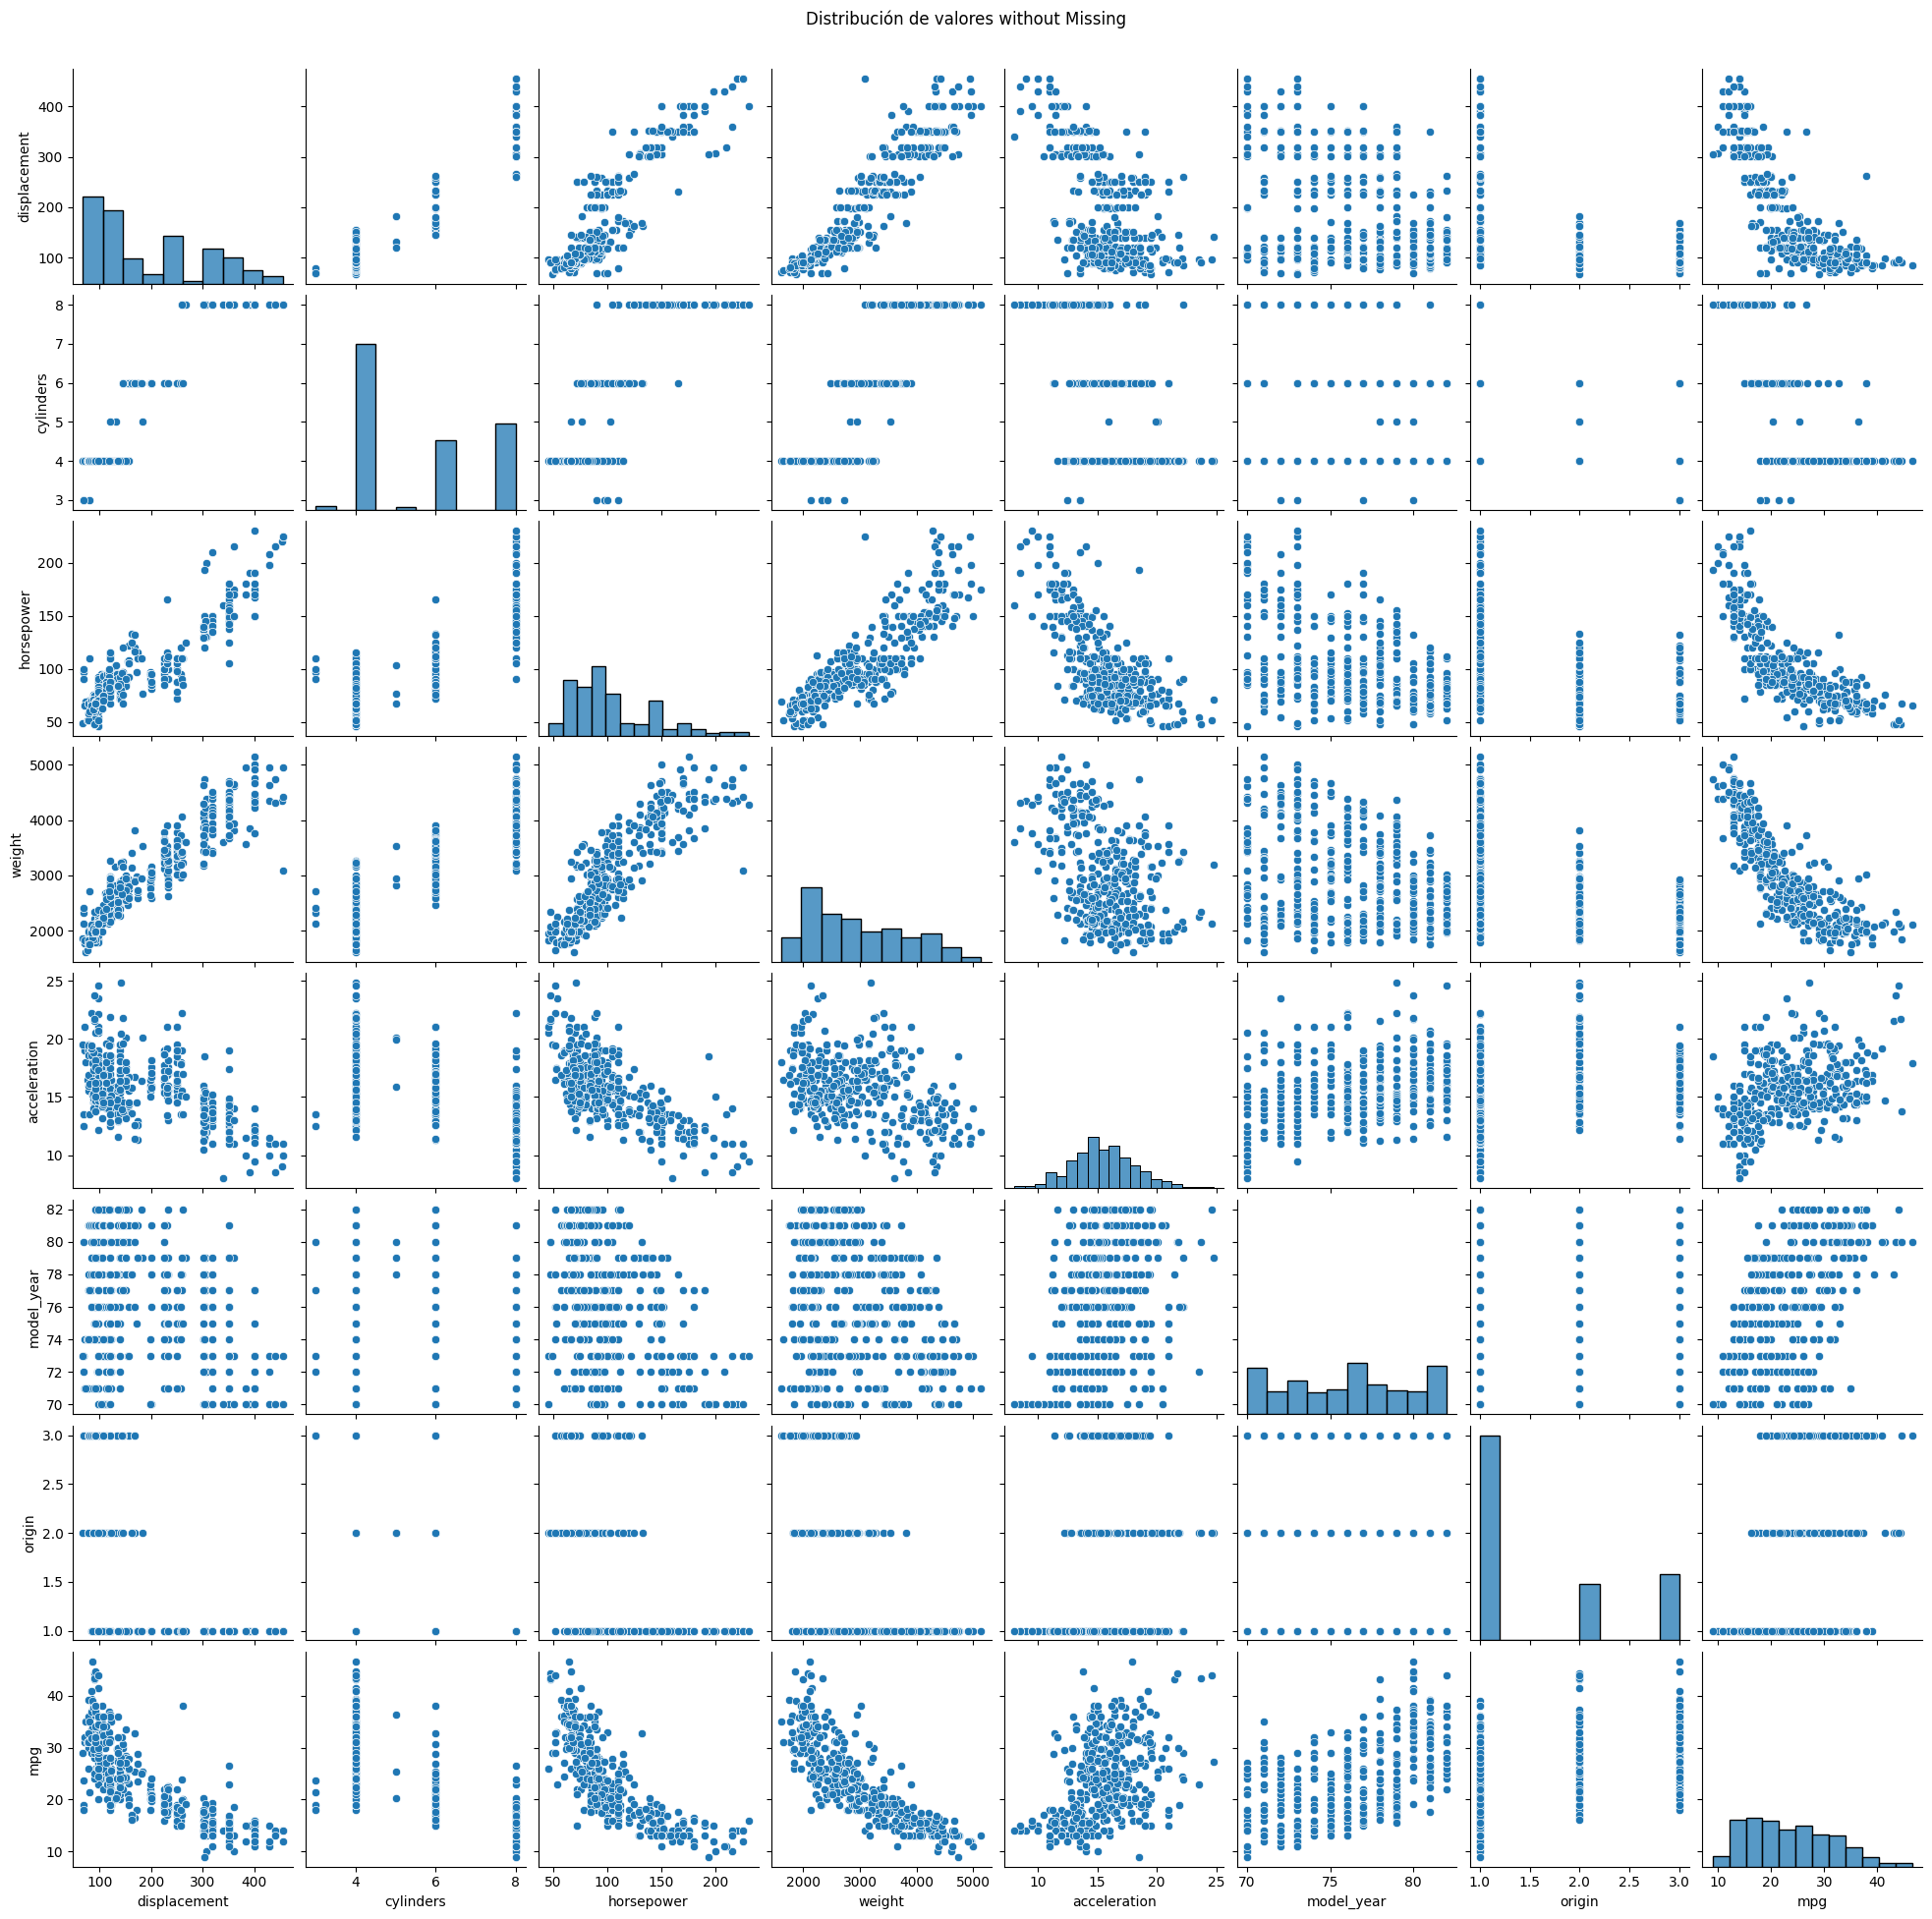

In [ ]:
# @title Distribución Valores Sin Datos Perdidos sin normalizar
sns.pairplot(df)
plt.suptitle("Distribución de valores without Missing")
plt.subplots_adjust(top=0.95)
plt.show()

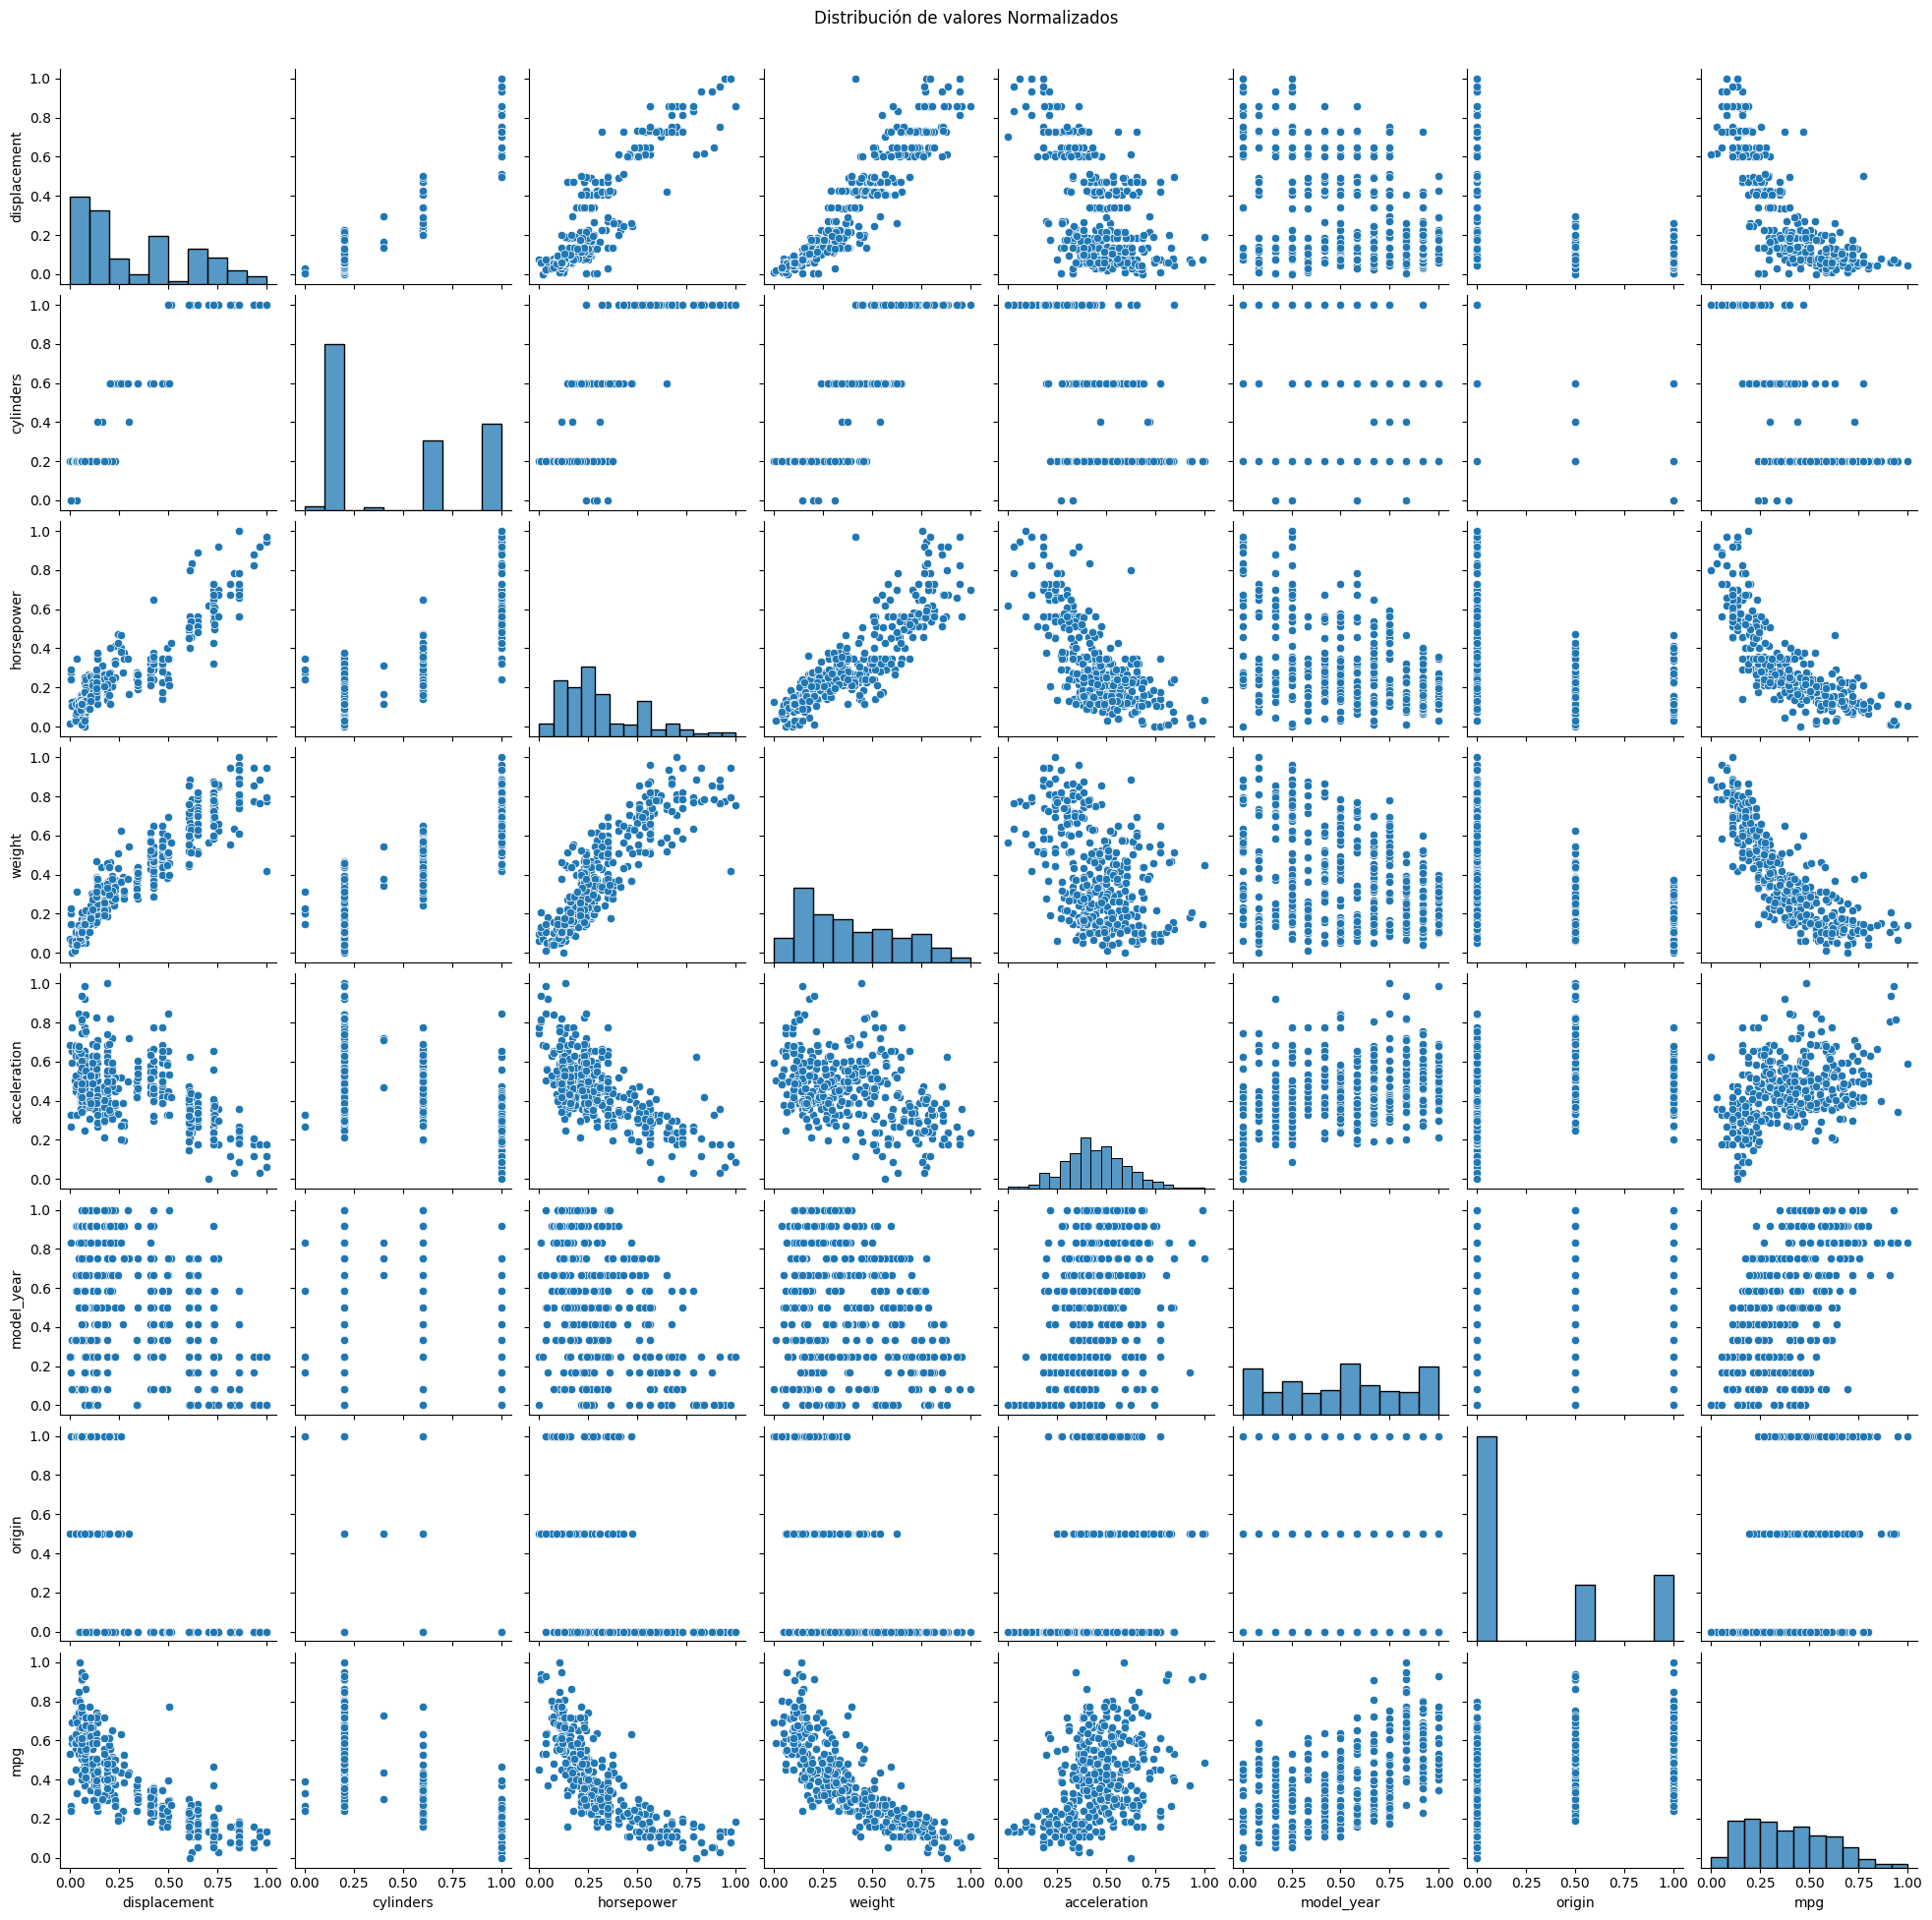

In [ ]:
# @title Distribución Valores Normalizados
sns.pairplot(X_norm)
plt.suptitle("Distribución de valores Normalizados")
plt.subplots_adjust(top=0.95)
plt.show()

### Histogramas

Text(0.5, 0.98, 'Histograma de las caracterisicas del dataset')

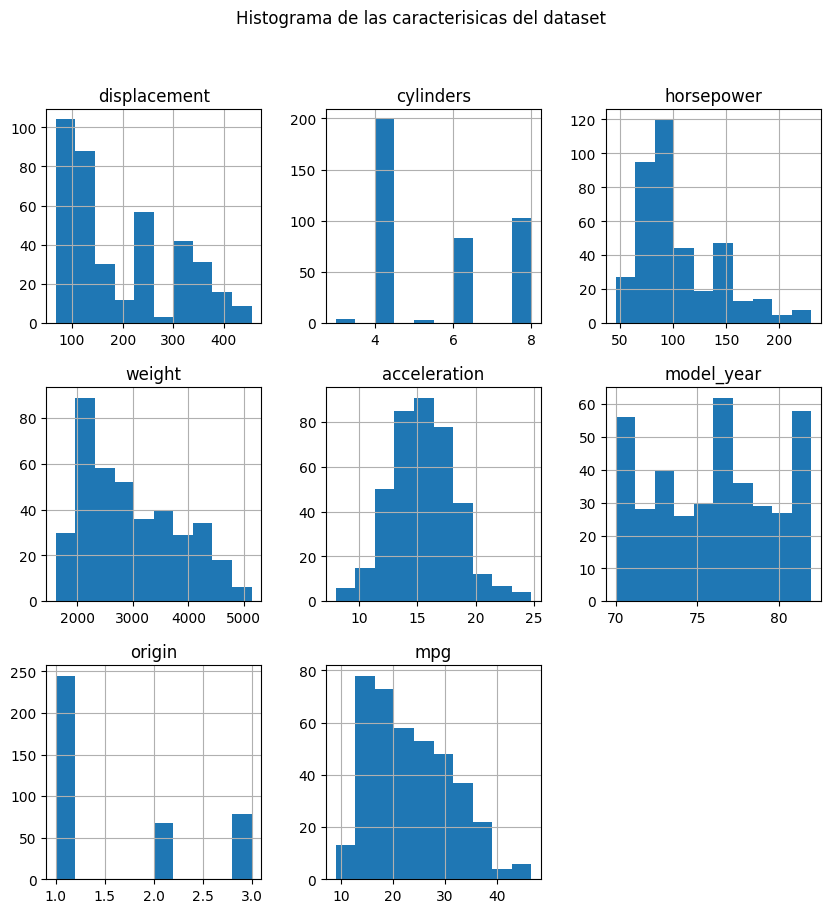

In [ ]:
# @title Histograma del dataset
df.hist(figsize=(10,10))
plt.suptitle("Histograma de las caracterisicas del dataset")

### Visualización de datos con scatterplot

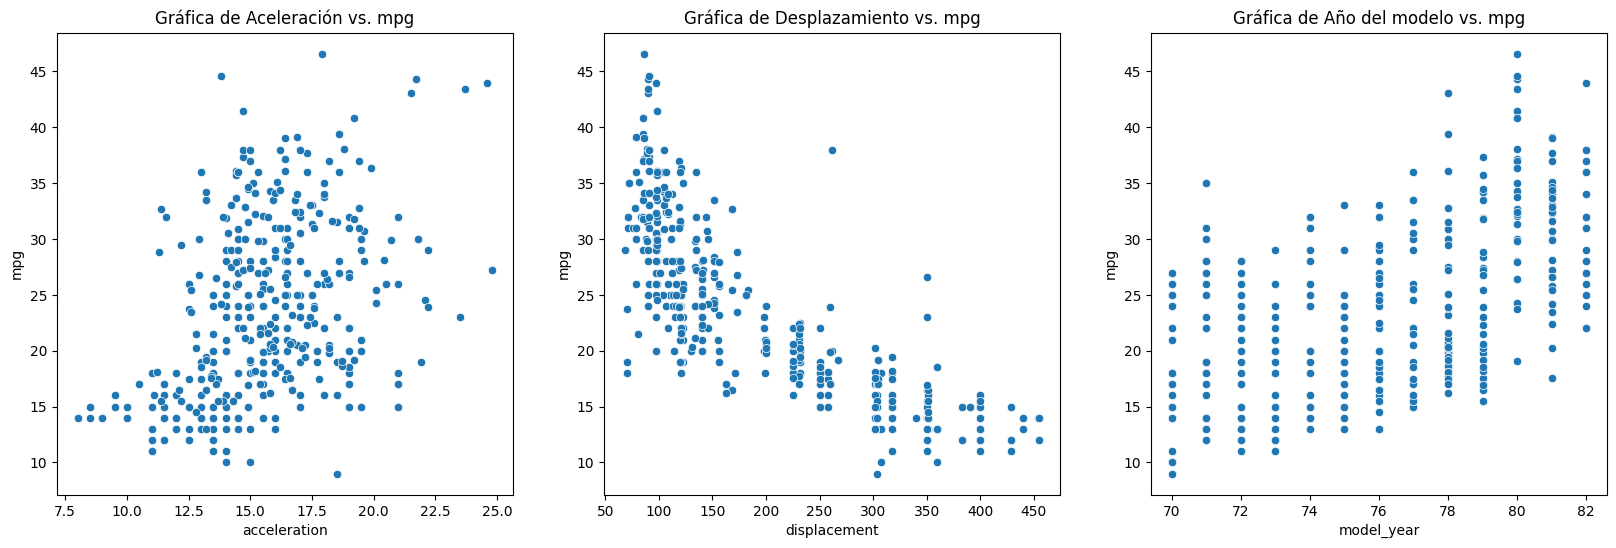

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))

sns.scatterplot(x="acceleration", y="mpg", data=df, ax=axs[0])
axs[0].set_title("Gráfica de Aceleración vs. mpg")

sns.scatterplot(x="displacement", y="mpg", data=df, ax=axs[1])
axs[1].set_title("Gráfica de Desplazamiento vs. mpg")

sns.scatterplot(x="model_year", y="mpg", data=df, ax=axs[2])
axs[2].set_title("Gráfica de Año del modelo vs. mpg")

plt.show()

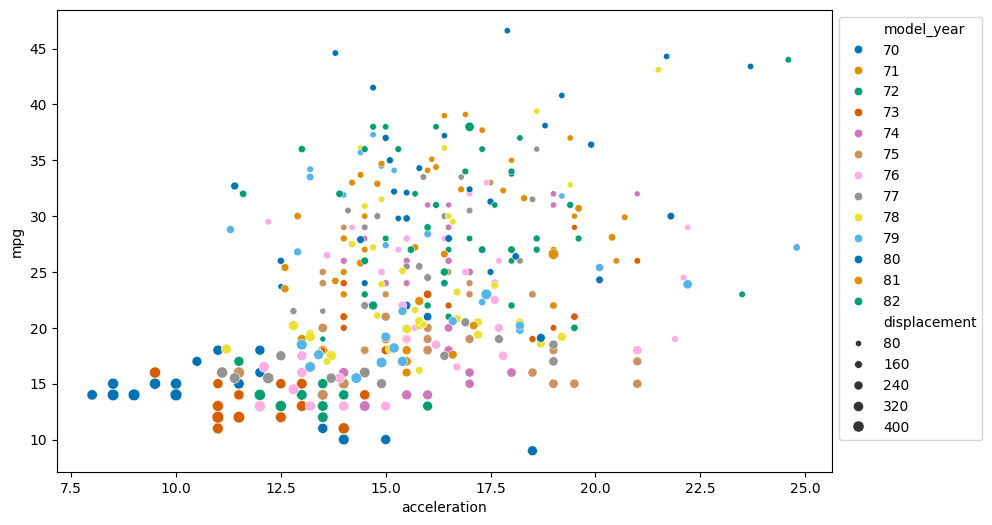

In [ ]:
# @title Gráfica en conjunto para visualizar la aceleración, año del modelo, desplazamiento y el objetivo: mpg
plt.figure(figsize=(10,6))
sns.scatterplot(x="acceleration", y="mpg", hue="model_year", size="displacement", palette="colorblind", data=df)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

### Regresores

In [ ]:
!pip install --upgrade pip setuptools==57.5.0
!pip install regressors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 50.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 57.5.0 which is incompatible.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 57.5.0 which is incompatible.


  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12398 sha256=e353e0a0c3777bbb2c531fbc447899c06271a7a18e70bffb4ef68c98374a58b2
  Stored in directory: /root/.cache/pip/wheels/85/e8/ec/b8fe5e2d41af2f4760b0d8ce1ae8f01c78df5d1b0883dee2fe
Successfully built regressors


Se importan las librerias las cuales se van a usar para un modelo sencillo donde se podran observar las metricas

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics
from regressors import stats

Se dividen los datos entre entrenamiento y validacion, usando 70/30, y una semilla de 42 para poder hacer que los datos puedan ser replicables

In [ ]:
print(X_modified.shape)
print(y.shape)

(392, 6)
(392,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_modified,y, test_size=0.3, random_state=42)
# 392 instancias
# El 70% de entrenamiento --> 274
# El 30% de validación --> 118

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(274, 6)
(274,)
(118, 6)
(118,)


Se crea un scalador para tener normalizado los datos, y nuestro modelo el cual se usara el linearRegression, el pipeline se usa para poder evitar fugaz, permiten optimizacion de parametros. Es decir, se estandariza los datos de entrada y luego aplica un modelo de regresión lineal para hacer predicciones sobre esos datos.

In [ ]:
scaler = StandardScaler()
model = LinearRegression()
pipeline = make_pipeline(scaler, model)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)

   1. Mean Squared Error (MSE - Error cuadrático medio):
El error cuadrático medio (MSE) es una medida que calcula el promedio de los cuadrados de las diferencias entre los valores predichos por el modelo y los valores reales. En otras palabras, calcula la suma de los cuadrados de los errores dividida por el número de muestras. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.
   2. R-squared (R² - Coeficiente de determinación):
El coeficiente de determinación, también conocido como R-squared (R²), es una medida que indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. El R² varía entre 0 y 1, donde 1 indica un ajuste perfecto y 0 indica que el modelo no explica ninguna variabilidad de los datos.

   3. Mean Absolute Error (MAE - Error absoluto medio):
El error absoluto medio (MAE) es una medida que calcula el promedio de las diferencias absolutas entre los valores predichos por el modelo y los valores reales. Cuanto menor sea el MAE, mejor será el rendimiento del modelo.

In [ ]:
print("R2", r2.round(4))
print("mse", mse.round(4))
print("mae", mae.round(4))

R2 0.8077
mse 10.1752
mae 2.5403


In [ ]:
nombres_caracteristicas = ['displacement',	'cylinders',	'horsepower'	,'weight',	'acceleration',	'model_year']

print("Término de intercepción:", model.intercept_)
print("-")*100
print("Coeficientes de las características:")
for nombre, coeficiente in zip(nombres_caracteristicas, model.coef_):
    print(f"{nombre}: {coeficiente}")


Término de intercepción: 23.637591240875913
Coeficientes de las características:
displacement: 0.03315452256696471
cylinders: -0.15860306981035288
horsepower: -0.3567953154957435
weight: -5.342112219282159
acceleration: 0.18374955210241206
model_year: 2.633404142641307


displacement: Un incremento de una unidad en el desplazamiento del motor se asocia con un aumento de aproximadamente 0.0331 millas por galón en el consumo de combustible, manteniendo constantes las demás características.

cylinders: Un incremento de una unidad en el número de cilindros se asocia con una disminución de aproximadamente 0.1586 millas por galón en el consumo de combustible, manteniendo constantes las demás características.

horsepower: Un incremento de una unidad en la potencia del motor se asocia con una disminución de aproximadamente 0.3568 millas por galón en el consumo de combustible, manteniendo constantes las demás características.

weight: Un incremento de una unidad en el peso del vehículo se asocia con una disminución de aproximadamente 5.3421 millas por galón en el consumo de combustible, manteniendo constantes las demás características.

acceleration: Un incremento de una unidad en la aceleración se asocia con un aumento de aproximadamente 0.1837 millas por galón en el consumo de combustible, manteniendo constantes las demás características.

model_year: Un incremento de una unidad en el año de fabricación del modelo del automóvil se asocia con un aumento de aproximadamente 2.6334 millas por galón en el consumo de combustible, manteniendo constantes las demás características

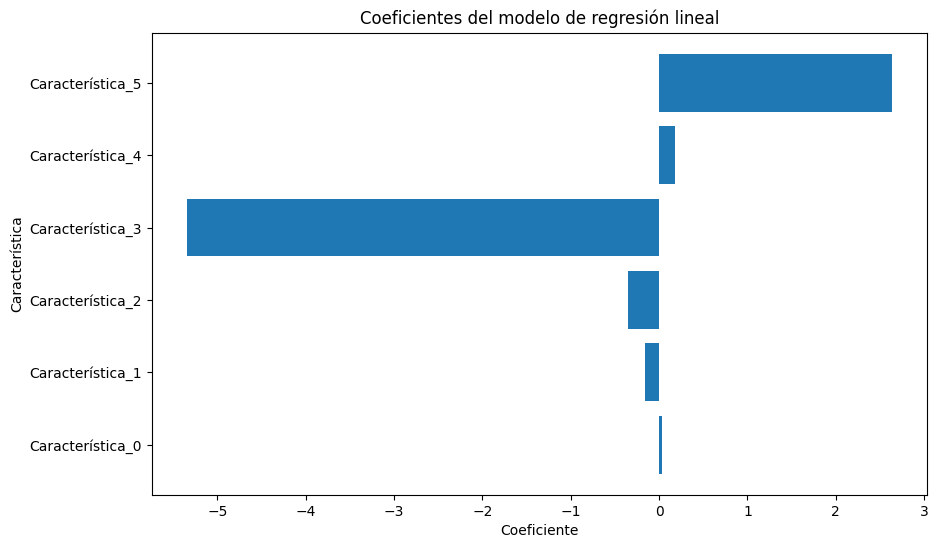

Término de intercepción: 23.637591240875913


In [ ]:
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo
coeficientes = model.coef_
intercepcion = model.intercept_

# Obtener los nombres de las características
nombres_caracteristicas = ["Característica_" + str(i) for i in range(len(coeficientes))]

# Crear un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, coeficientes)
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Coeficientes del modelo de regresión lineal')
plt.show()

# Mostrar el término de intercepción
print("Término de intercepción:", intercepcion)


In [ ]:
print("===================================================================summary===================================================================")
stats.summary(model, X_test, y_test, ['cylinders','horsepower','acceleration','displacement','model_year','weight'] )

===================================================================summary===================================================================
Residuals:
     Min      1Q  Median     3Q   Max
-18.3714 -3.7938  0.9507 4.3115 8.695


Coefficients:
               Estimate  Std. Error  t value   p value
_intercept    23.637591    2.240690  10.5492  0.000000
cylinders      0.033155    7.571816   0.0044  0.996514
horsepower    -0.158603    3.920688  -0.0405  0.967801
acceleration  -0.356795    7.191702  -0.0496  0.960516
displacement  -5.342112    6.613189  -0.8078  0.420847
model_year     0.183750    4.591769   0.0400  0.968148
weight         2.633404    1.635299   1.6104  0.110016
---
R-squared:  0.39850,    Adjusted R-squared:  0.36598
F-statistic: 12.26 on 6 features


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr

1. Residuals (Residuos):

 * Min: El valor mínimo de los residuos. Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo. Un valor mínimo negativo indica que algunos de los valores observados están por debajo de las predicciones del modelo.
 * 1Q: El primer cuartil de los residuos. Indica el valor que separa el 25% más bajo de los residuos del 75% más alto.
Median: La mediana de los residuos. Indica el valor que separa los valores más bajos y más altos en el conjunto de residuos.
 * 3Q: El tercer cuartil de los residuos. Indica el valor que separa el 75% más bajo de los residuos del 25% más alto.
Max: El valor máximo de los residuos. Un valor máximo negativo indica que algunos de los valores observados están por encima de las predicciones del modelo.
2. Coefficients (Coeficientes):

 * Estimate (Estimación): El valor estimado del coeficiente para cada característica en el modelo de regresión lineal. Indica cuánto cambia la variable dependiente por unidad de cambio en la característica correspondiente, manteniendo constantes todas las demás características.
 * Std. Error (Error estándar): La desviación estándar del coeficiente estimado. Mide la precisión de la estimación del coeficiente. Un error estándar más pequeño indica una estimación más precisa.
 * t value: El valor t calculado para el coeficiente. Es la relación entre el valor estimado del coeficiente y su error estándar. Un valor t mayor indica una mayor significancia del coeficiente.
 * p value: El valor p asociado al coeficiente. Indica la probabilidad de observar el valor estimado del coeficiente (o un valor más extremo) si la verdadera relación entre la característica y la variable dependiente fuera cero. Un valor p pequeño (generalmente, menor que 0.05) sugiere que el coeficiente es significativamente diferente de cero.
3. R-squared (R-cuadrado) y F-statistic (Estadística F):

 * R-squared: Es una medida de cuánta variabilidad en la variable dependiente es explicada por el modelo. En este caso, el valor negativo sugiere que el modelo no es adecuado para los datos y está sobreajustado.
 * Adjusted R-squared (R-cuadrado ajustado): Es una versión ajustada de R-cuadrado que tiene en cuenta el número de características en el modelo y el tamaño de la muestra. También sugiere que el modelo no es adecuado para los datos.
 * F-statistic: Es una prueba estadística que evalúa si al menos una de las características tiene un efecto significativo en la variable dependiente. Un valor F negativo sugiere que el modelo en su conjunto no es adecuado para los datos.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Esta clase hereda de las clases BaseEstimator y TransformerMixin de scikit-learn, lo que permite que sea compatible con los pipelines de scikit-learn.
El constructor __init__ inicializa el transformador con un estimador específico, que se utilizará para realizar las predicciones.
El método fit ajusta el estimador a los datos de entrenamiento. En este caso, se utiliza el método fit del estimador interno.
El método transform utiliza el estimador ajustado para realizar predicciones sobre los datos de entrada X. Luego, reformatea las predicciones para que tengan la forma adecuada antes de devolverlas.

In [ ]:

class EstimatorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        self.estimator.fit(X, y)
        return self

    def transform(self, X):
        return self.estimator.predict(X).reshape(-1, 1)

regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('estimators', FeatureUnion([
        ('linearR', EstimatorTransformer(LinearRegression())),
        ('lasso', EstimatorTransformer(Lasso())),
        ('ridge', EstimatorTransformer(Ridge())),
        ('elastic', EstimatorTransformer(ElasticNet()))
    ]))
])

regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimators',
                 FeatureUnion(transformer_list=[('linearR',
                                                 EstimatorTransformer(estimator=LinearRegression())),
                                                ('lasso',
                                                 EstimatorTransformer(estimator=Lasso())),
                                                ('ridge',
                                                 EstimatorTransformer(estimator=Ridge())),
                                                ('elastic',
                                                 EstimatorTransformer(estimator=ElasticNet()))]))])

Funciones de optimizacion:
1. Lasso((1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1)
2. Ridge(||y - Xw||^2_2 + alpha * ||w||^2_2)
3. ElasticNet(1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_ + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2)
4.LinearRegression(J(θ)=
2n
1
​
 ∑
i=1
n
​
 (y
i
​
 −h
θ
​
 (x
i
​
 ))
2)

In [ ]:

# Get predictions from the pipeline
predictions = regression_pipeline.transform(X_test)

# Separate predictions from each estimator
linear_regression_preds = predictions[:, 0]
lasso_preds = predictions[:, 1]
ridge_preds = predictions[:, 2]
elastic_net_preds = predictions[:, 3]

# Calculate MSE and R² for each estimator
linear_regression_mse = mean_squared_error(y_test, linear_regression_preds)
linear_regression_r2 = r2_score(y_test, linear_regression_preds)
linear_regression_mae = mean_absolute_error(y_test, linear_regression_preds)

lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)

ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_mae = mean_absolute_error(y_test, ridge_preds)

elastic_net_mse = mean_squared_error(y_test, elastic_net_preds)
elastic_net_r2 = r2_score(y_test, elastic_net_preds)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_preds)

# Print the results
print("Linear Regression: MSE = {:.2f}, R² = {:.2f}, mae = {:.2f}".format(linear_regression_mse, linear_regression_r2, linear_regression_mae))
print("Lasso: MSE = {:.2f}, R² = {:.2f}, mae ={:.2f}".format(lasso_mse, lasso_r2, lasso_mae))
print("Ridge: MSE = {:.2f}, R² = {:.2f}, mae = {:.2f}".format(ridge_mse, ridge_r2, ridge_mae))
print("Elastic Net: MSE = {:.2f}, R² = {:.2f}, mae = {:.2f}".format(elastic_net_mse, elastic_net_r2, elastic_net_mae))

Linear Regression: MSE = 10.18, R² = 0.81, mae = 2.54
Lasso: MSE = 10.19, R² = 0.81, mae =2.42
Ridge: MSE = 10.23, R² = 0.81, mae = 2.55
Elastic Net: MSE = 12.79, R² = 0.76, mae = 2.77


1. MSE (Mean Squared Error - Error Cuadrático Medio):

El MSE es una medida de la calidad del ajuste del modelo a los datos.
Representa el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.
Un MSE más bajo indica un mejor ajuste del modelo a los datos.
En este caso, los valores de MSE son 10.18 para Linear Regression, 10.19 para Lasso, 10.23 para Ridge, y 12.79 para Elastic Net.
2. R² (Coefficient of Determination - Coeficiente de Determinación):

El R² es una medida de cuánta variabilidad en la variable dependiente es explicada por el modelo.
Varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos.
Cuanto más cercano a 1 sea el R², mejor se ajusta el modelo a los datos.
En este caso, todos los modelos tienen un R² de alrededor de 0.81, lo que sugiere que aproximadamente el 81% de la variabilidad en la variable dependiente es explicada por el modelo.
3. MAE (Mean Absolute Error - Error Absoluto Medio):

El MAE es otra medida de la precisión del modelo.
Representa el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales.
Un MAE más bajo indica un mejor ajuste del modelo a los datos.
En este caso, los valores de MAE son 2.54 para Linear Regression, 2.42 para Lasso, 2.55 para Ridge, y 2.77 para Elastic Net.

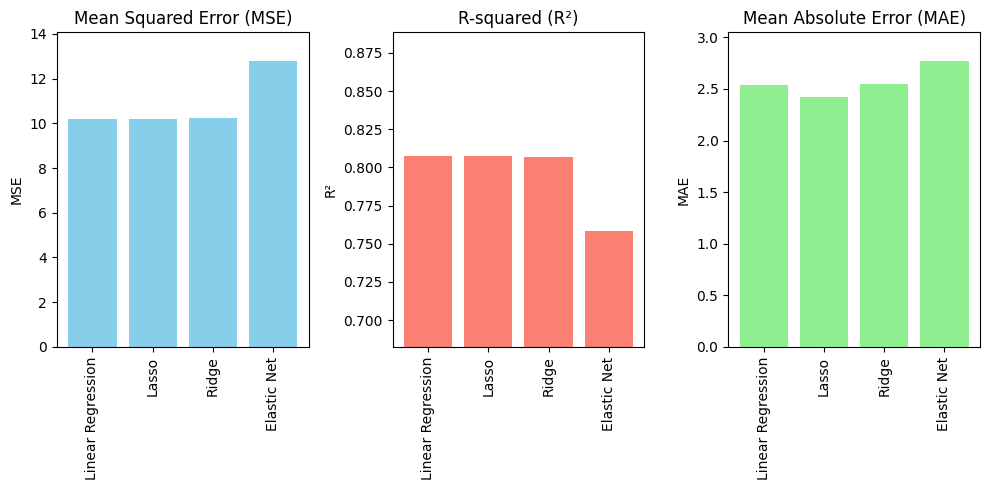

In [ ]:

# Labels for the models
models = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net']

# Mean Squared Error (MSE) values
mse_values = [linear_regression_mse, lasso_mse, ridge_mse, elastic_net_mse]

# R-squared (R²) values
r2_values = [linear_regression_r2, lasso_r2, ridge_r2, elastic_net_r2]

# Mean Absolute Error (MAE) values
mae_values = [linear_regression_mae, lasso_mae, ridge_mae, elastic_net_mae]

# Plotting the MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim([0, max(mse_values) * 1.1])
plt.xticks(rotation=90)

# Plotting the R²
plt.subplot(1, 3, 2)
plt.bar(models, r2_values, color='salmon')
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.ylim([min(r2_values) * 0.9, max(r2_values) * 1.1])
plt.xticks(rotation=90)

# Plotting the MAE
plt.subplot(1, 3, 3)
plt.bar(models, mae_values, color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.ylim([0, max(mae_values) * 1.1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

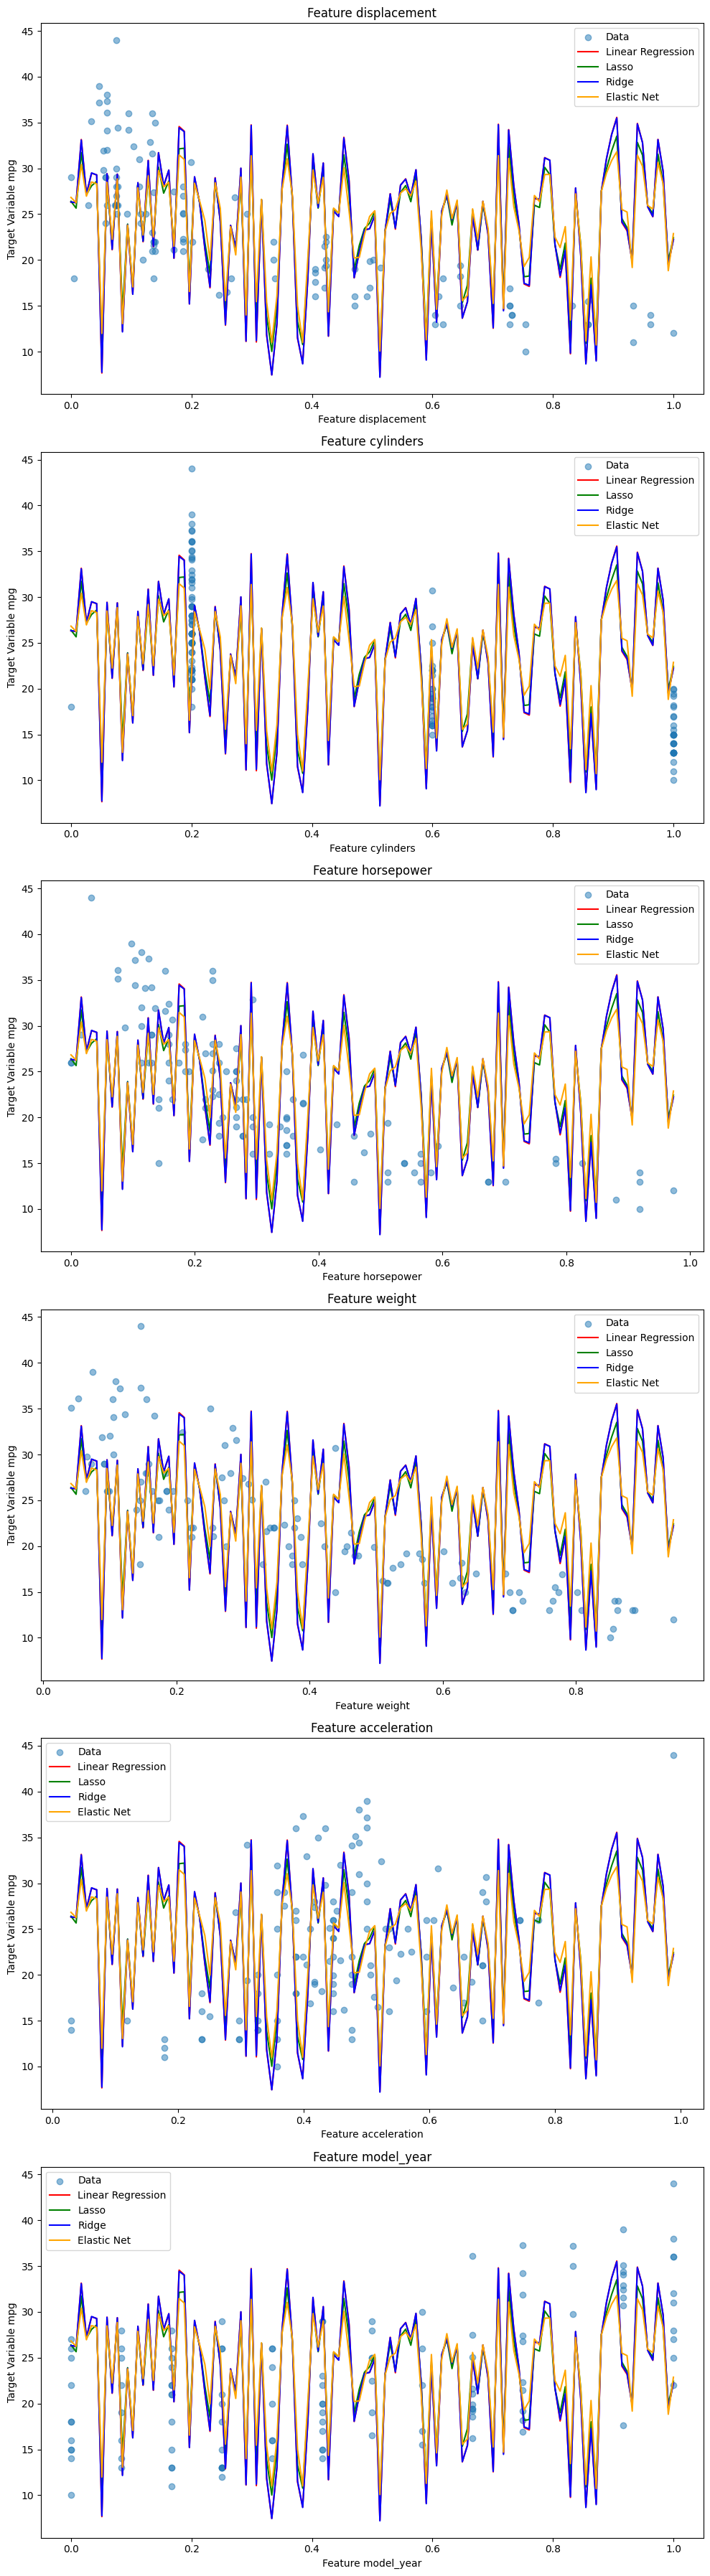

In [ ]:


# Obtener el número de características
num_features = X_test.shape[1]
caracteristicas = ['displacement',	'cylinders',	'horsepower'	,'weight',	'acceleration',	'model_year']

# Crear subgráficos para cada característica
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6*num_features))

# Iterar sobre cada característica de X_test
for i, ax in enumerate(axes):
    # Seleccionar una característica específica de X_test
    X_test_single_feature = X_test.iloc[:, i].values.reshape(-1, 1)

    # Graficar los puntos de datos
    ax.scatter(X_test_single_feature, y_test, label='Data', alpha=0.5)

    # Graficar la línea de regresión para cada modelo
    x_line = np.linspace(X_test_single_feature.min(), X_test_single_feature.max(), len(X_test_single_feature)).reshape(-1, 1)

    linear_regression_line = linear_regression_preds.reshape(-1, 1)
    ax.plot(x_line, linear_regression_line, label='Linear Regression', color='red')

    lasso_line = lasso_preds.reshape(-1, 1)
    ax.plot(x_line, lasso_line, label='Lasso', color='green')

    ridge_line = ridge_preds.reshape(-1, 1)
    ax.plot(x_line, ridge_line, label='Ridge', color='blue')

    elastic_net_line = elastic_net_preds.reshape(-1, 1)
    ax.plot(x_line, elastic_net_line, label='Elastic Net', color='orange')

    # Establecer título y etiquetas de ejes
    ax.set_title(f'Feature {caracteristicas[i]}')
    ax.set_xlabel(f'Feature {caracteristicas[i]}')
    ax.set_ylabel(f'Target Variable mpg')
    ax.legend()

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

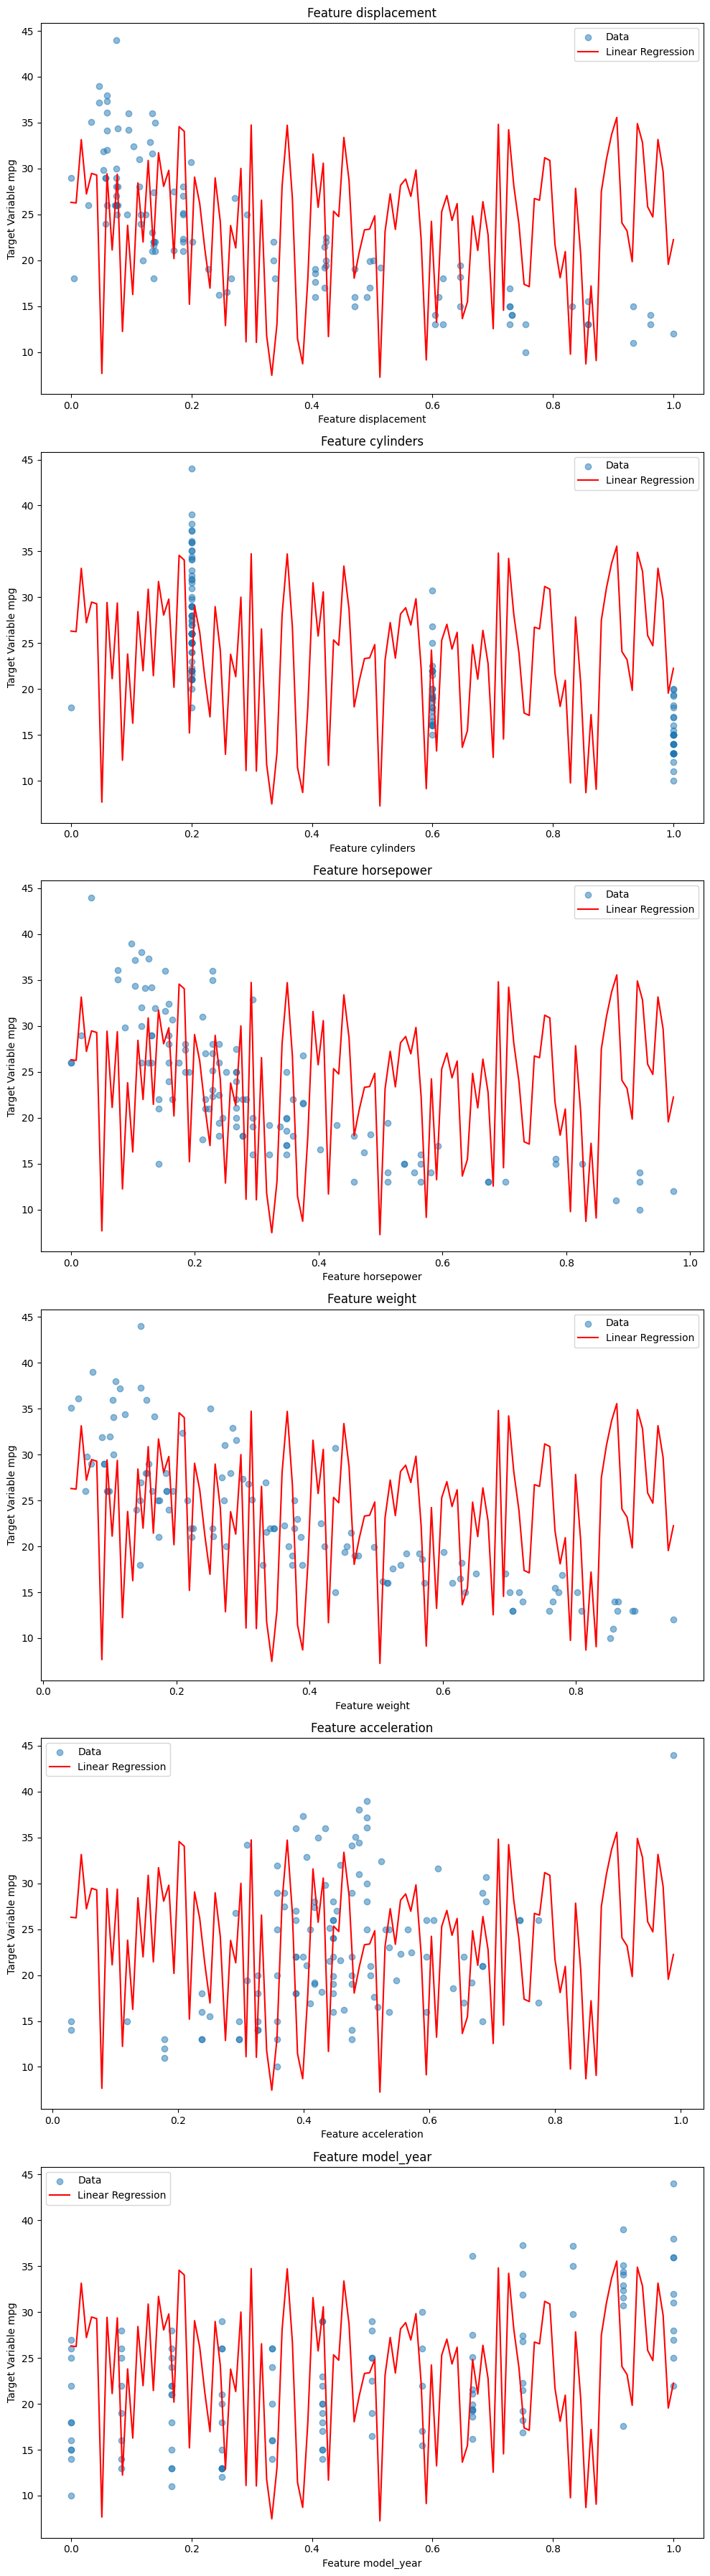

In [ ]:
# Obtener el número de características
num_features = X_test.shape[1]
caracteristicas = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year']

# Crear subgráficos para cada característica
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6*num_features))

# Iterar sobre cada característica de X_test
for i, ax in enumerate(axes):
    # Seleccionar una característica específica de X_test
    X_test_single_feature = X_test.iloc[:, i].values.reshape(-1, 1)

    # Graficar los puntos de datos
    ax.scatter(X_test_single_feature, y_test, label='Data', alpha=0.5)

    # Graficar la línea de regresión para la regresión lineal
    x_line = np.linspace(X_test_single_feature.min(), X_test_single_feature.max(), len(X_test_single_feature)).reshape(-1, 1)

    linear_regression_line = linear_regression_preds.reshape(-1, 1)
    ax.plot(x_line, linear_regression_line, label='Linear Regression', color='red')

    # Establecer título y etiquetas de ejes
    ax.set_title(f'Feature {caracteristicas[i]}')
    ax.set_xlabel(f'Feature {caracteristicas[i]}')
    ax.set_ylabel(f'Target Variable mpg')
    ax.legend()

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


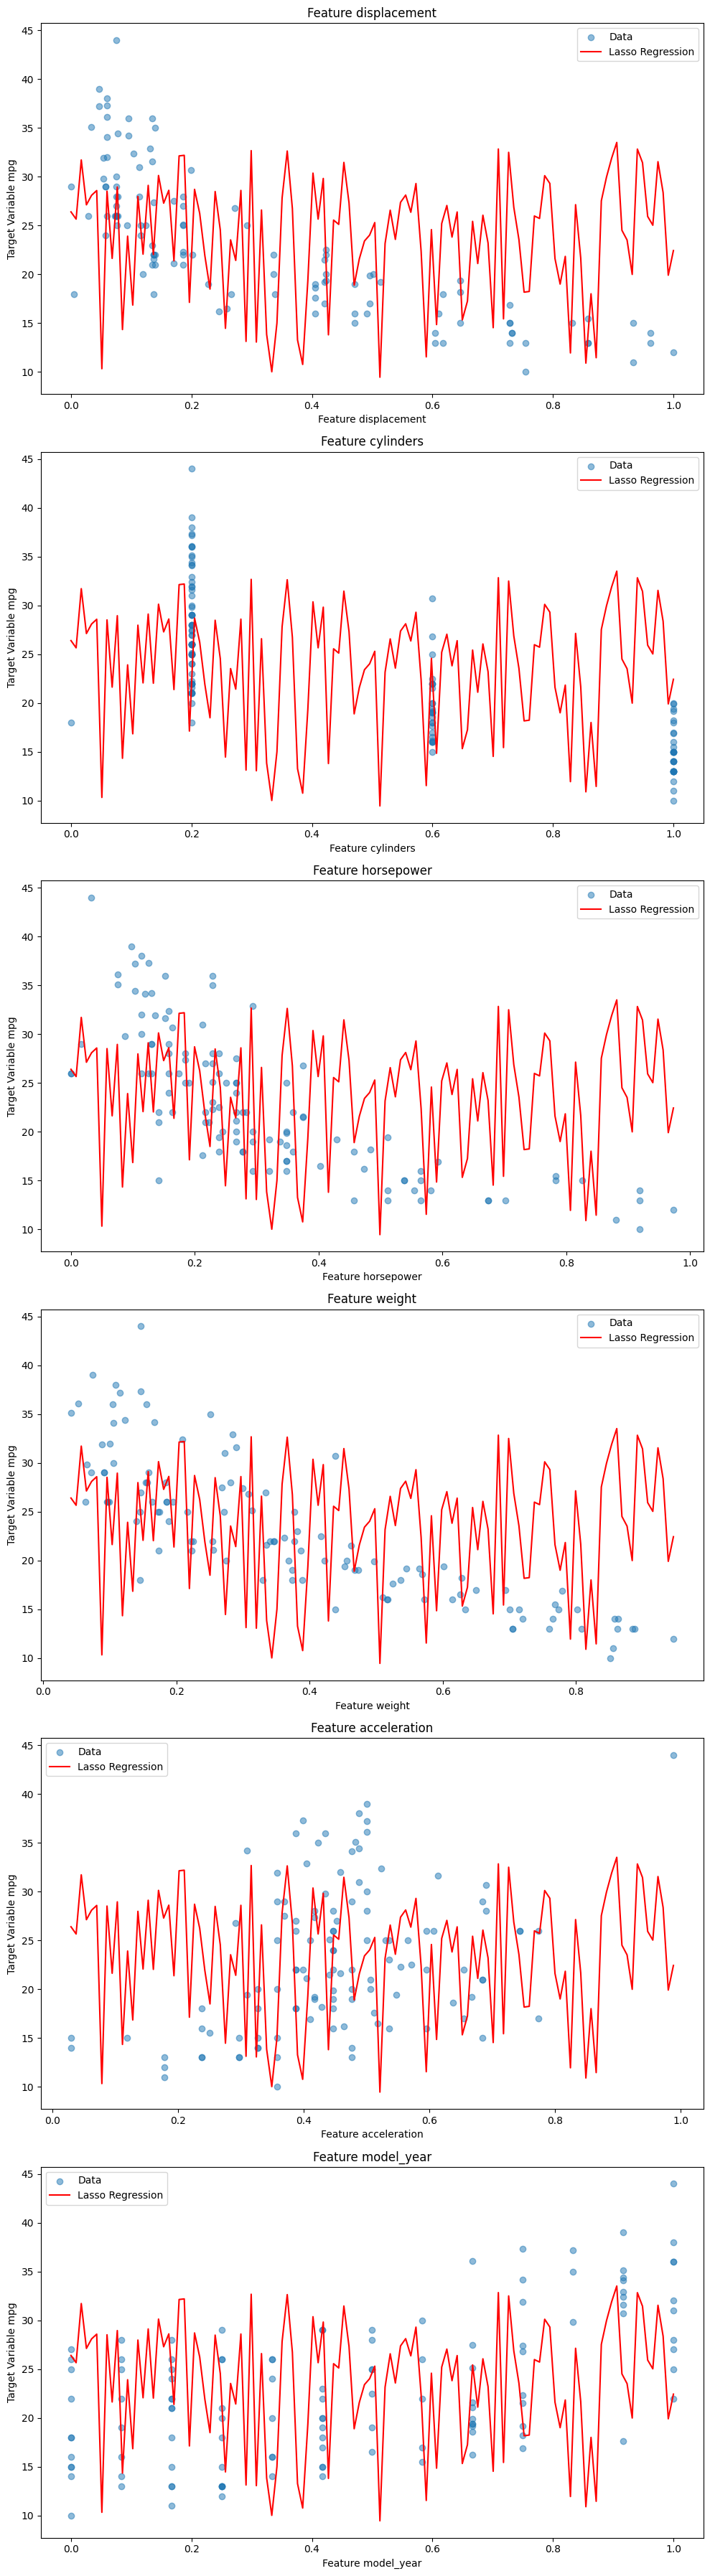

In [ ]:
# Obtener el número de características
num_features = X_test.shape[1]
caracteristicas = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year']

# Crear subgráficos para cada característica
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6*num_features))

# Iterar sobre cada característica de X_test
for i, ax in enumerate(axes):
    # Seleccionar una característica específica de X_test
    X_test_single_feature = X_test.iloc[:, i].values.reshape(-1, 1)

    # Graficar los puntos de datos
    ax.scatter(X_test_single_feature, y_test, label='Data', alpha=0.5)

    # Graficar la línea de regresión para la regresión lineal
    x_line = np.linspace(X_test_single_feature.min(), X_test_single_feature.max(), len(X_test_single_feature)).reshape(-1, 1)

    lasso_regression_line = lasso_preds.reshape(-1, 1)
    ax.plot(x_line, lasso_regression_line, label='Lasso Regression', color='red')

    # Establecer título y etiquetas de ejes
    ax.set_title(f'Feature {caracteristicas[i]}')
    ax.set_xlabel(f'Feature {caracteristicas[i]}')
    ax.set_ylabel(f'Target Variable mpg')
    ax.legend()

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

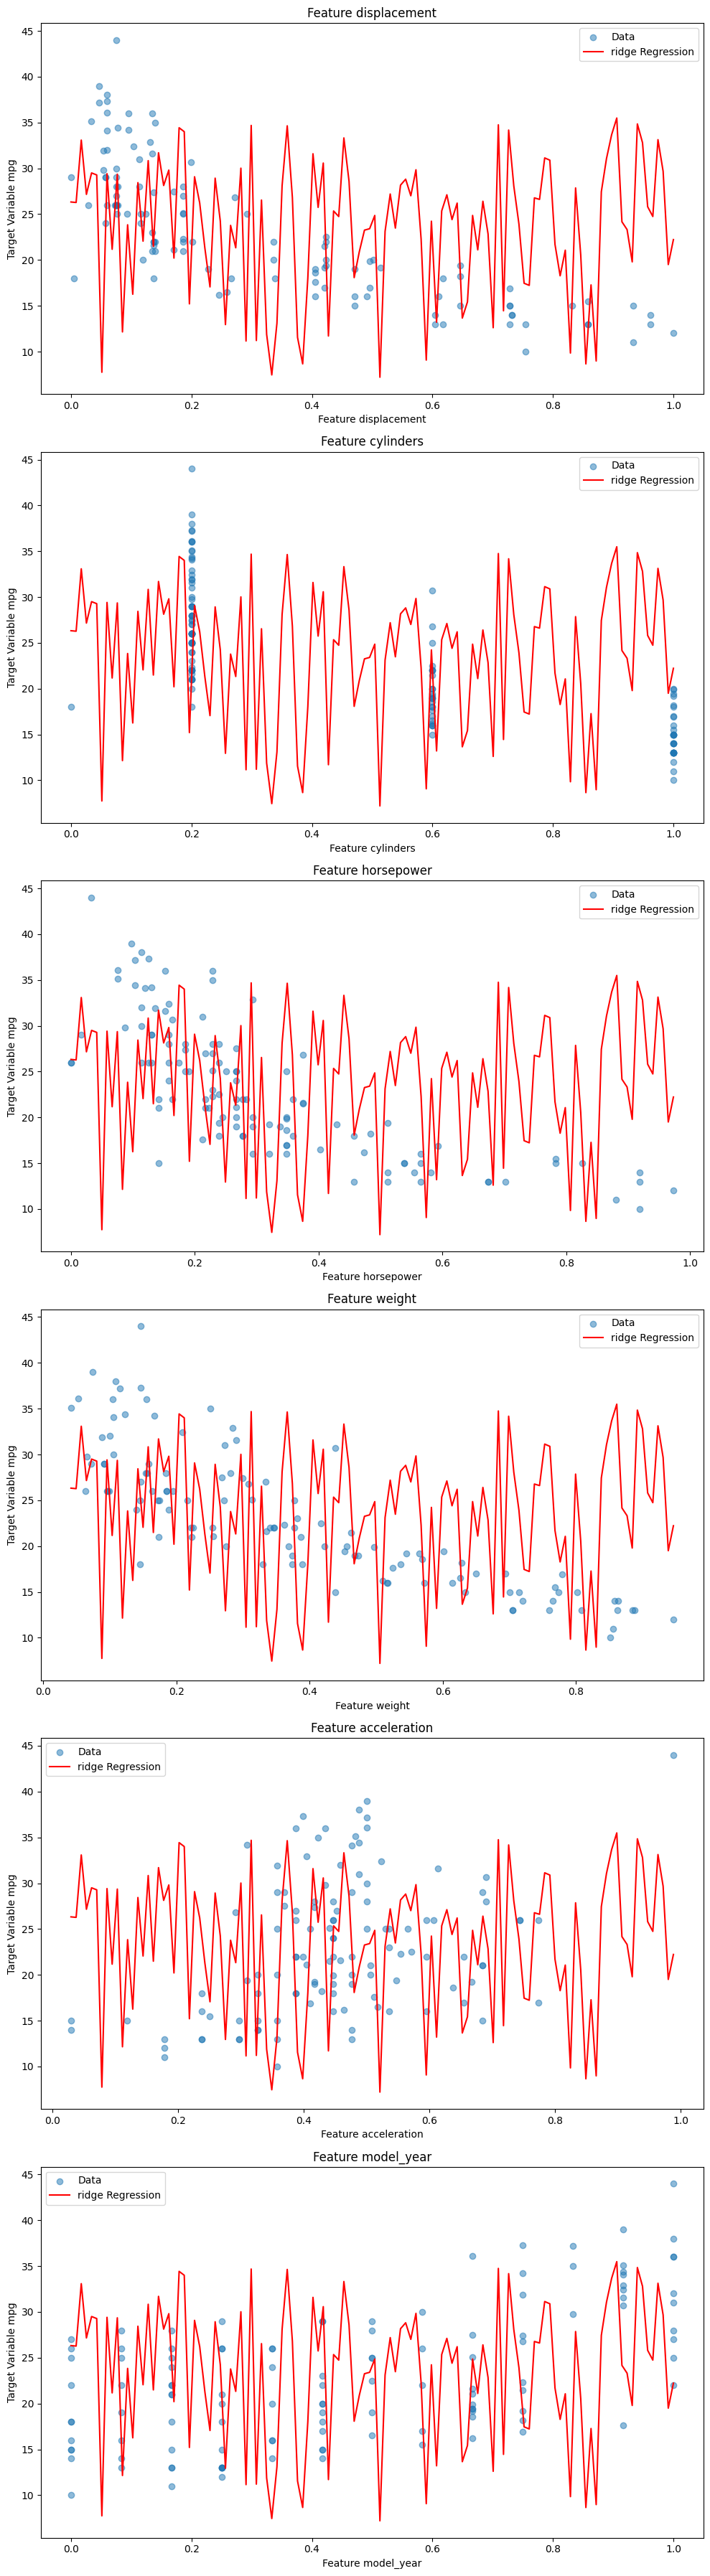

In [ ]:
# Obtener el número de características
num_features = X_test.shape[1]
caracteristicas = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year']

# Crear subgráficos para cada característica
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6*num_features))

# Iterar sobre cada característica de X_test
for i, ax in enumerate(axes):
    # Seleccionar una característica específica de X_test
    X_test_single_feature = X_test.iloc[:, i].values.reshape(-1, 1)

    # Graficar los puntos de datos
    ax.scatter(X_test_single_feature, y_test, label='Data', alpha=0.5)

    # Graficar la línea de regresión para la regresión lineal
    x_line = np.linspace(X_test_single_feature.min(), X_test_single_feature.max(), len(X_test_single_feature)).reshape(-1, 1)

    ridge_regression_line = ridge_preds.reshape(-1, 1)
    ax.plot(x_line, ridge_regression_line, label='ridge Regression', color='red')

    # Establecer título y etiquetas de ejes
    ax.set_title(f'Feature {caracteristicas[i]}')
    ax.set_xlabel(f'Feature {caracteristicas[i]}')
    ax.set_ylabel(f'Target Variable mpg')
    ax.legend()

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

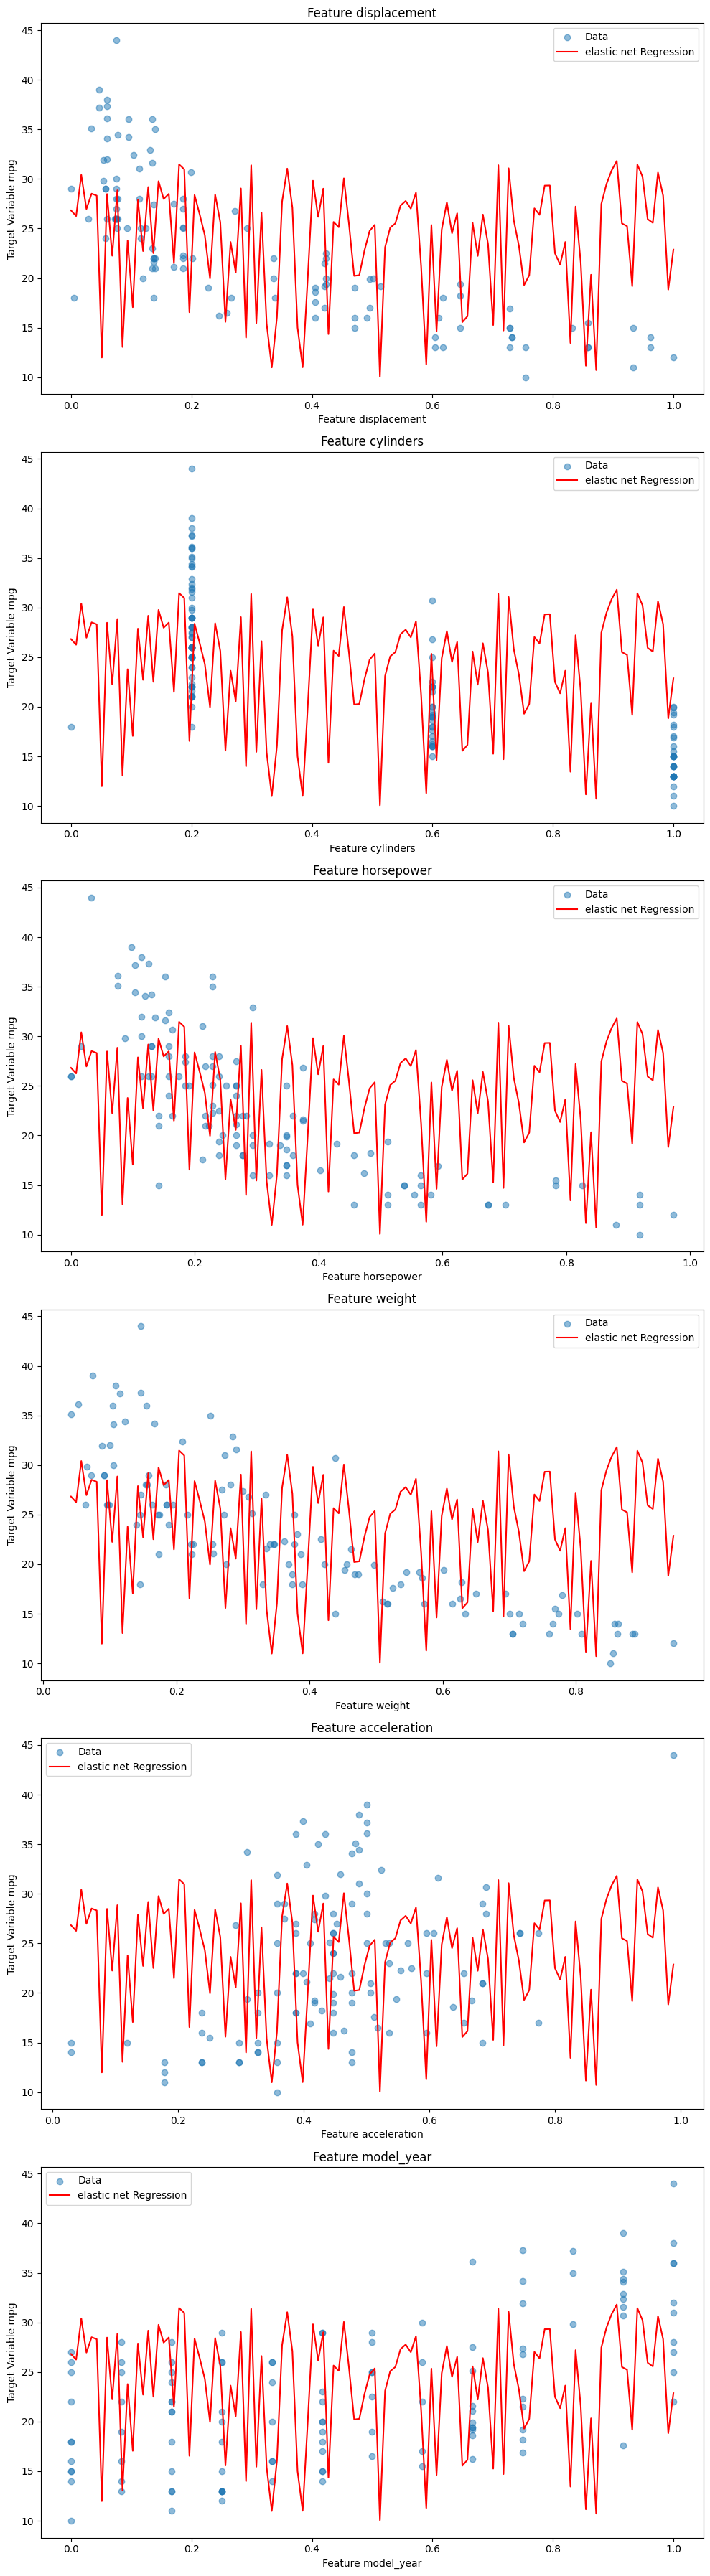

In [ ]:
# Obtener el número de características
num_features = X_test.shape[1]
caracteristicas = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year']

# Crear subgráficos para cada característica
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6*num_features))

# Iterar sobre cada característica de X_test
for i, ax in enumerate(axes):
    # Seleccionar una característica específica de X_test
    X_test_single_feature = X_test.iloc[:, i].values.reshape(-1, 1)

    # Graficar los puntos de datos
    ax.scatter(X_test_single_feature, y_test, label='Data', alpha=0.5)

    # Graficar la línea de regresión para la regresión lineal
    x_line = np.linspace(X_test_single_feature.min(), X_test_single_feature.max(), len(X_test_single_feature)).reshape(-1, 1)

    elastic_regression_line = elastic_net_preds.reshape(-1, 1)
    ax.plot(x_line, elastic_regression_line, label='elastic net Regression', color='red')

    # Establecer título y etiquetas de ejes
    ax.set_title(f'Feature {caracteristicas[i]}')
    ax.set_xlabel(f'Feature {caracteristicas[i]}')
    ax.set_ylabel(f'Target Variable mpg')
    ax.legend()

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

###Gradiente descendente

In [ ]:
def funcion_costo(theta,X,y):
  y_gorro = X.dot(theta)


  error= (y_gorro - y)

  m = X.shape[0]

  mse = (1.0 / m) * np.sum(np.square(error))

  gradiente = (1.0 / m) * error.dot(X)

  return gradiente, mse

In [ ]:
def gradiente_descendente_(learning_rate, X, y, tol=1e-8, max_iter=1000000):
  convergencia = False
  iteracion = 0
  theta = np.random.random(X.shape[1])
  cost = 0
  old_coef, old_cost_f = [],[]
  print("ANTES")


  while not convergencia:
    gradiente, cost_plus = funcion_costo(theta,X,y)

    new_theta = theta - learning_rate * gradiente
    old_coef.append(theta)
    old_cost_f.append(cost_plus)
    print(cost, cost_plus, tol)
    if abs(cost - cost_plus) <= tol:
      print('Convergencia despues de:', iteracion, 'iteraciones')
      convergencia = True

    cost = cost_plus
    iteracion += 1
    theta = new_theta

    if iteracion == max_iter:
      print('Maximas iteraciones alcanzadas!')
      convergencia = True
  return theta, old_coef, old_cost_f



In [ ]:
theta, old_coef, cost_fun = gradiente_descendente_(0.1, X_train, y_train)
print(theta)

In [ ]:
print(cost_fun)

[570.4628959844783, 481.0395418724669, 410.5458233244808, 354.77679928820027, 310.4710875089727, 275.09869617798535, 246.69658395662512, 223.74121069969436, 205.04975694864598, 189.70356252061555, 176.9887855548466, 166.3504079607701, 157.356584786833, 149.67101051777246, 143.0314988258096, 137.2333780385187, 132.11661904111938, 127.55585604028545, 123.4526494965847, 119.72948691882608, 116.32513066613922, 113.19100983192442, 110.28842143031088, 107.58635892094343, 105.05982704100258, 102.688533637573, 100.45587378060712, 98.34814049247287, 96.35391119886741, 94.46357045218886, 92.66893834976835, 90.962980944989, 89.33958427823701, 87.79337778481299, 86.31959603806239, 84.91397026707348, 83.57264301132683, 82.29210076520732, 81.06912062060643, 79.90072781135952, 78.78416175742362, 77.71684874480172, 76.69637979436446, 75.72049259611865, 74.78705663620798, 73.89406083835074, 73.03960319218567, 72.22188195792887, 71.43918812744916, 70.68989889224432, 69.97247192341533, 69.28544031113346,

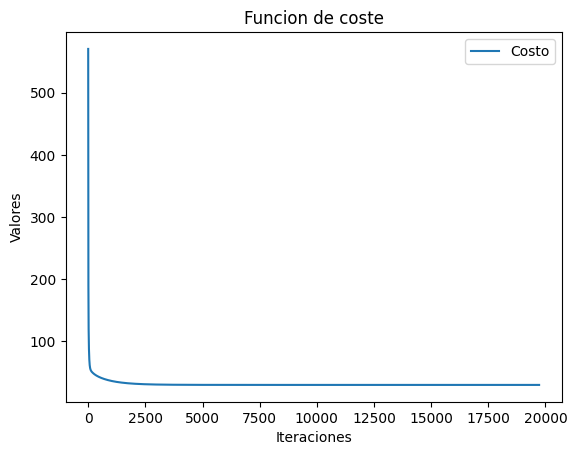

In [ ]:
plt.plot(cost_fun)
plt.title('Funcion de coste')  # Establecer título
plt.xlabel('Iteraciones')       # Establecer etiqueta del eje x
plt.ylabel('Valores')           # Establecer etiqueta del eje y
plt.legend(['Costo'])           # Establecer leyenda
plt.show()

In [ ]:
import numpy as np
# Calcular X^T X
XTX = np.dot(X_modified.T, X_modified)

# Calcular (X^T X)^-1
XTX_inv = np.linalg.inv(XTX)

# Calcular X^T Y
XTY = np.dot(X_modified.T, y)

# Calcular theta_hat
theta_hat = np.dot(XTX_inv, XTY)

print("Theta hat (intercepto, pendiente):", theta_hat)

# Ecuación de regresión lineal: y_hat = theta_0 + theta_1 * x
intercept, slope = theta_hat[0], theta_hat[1]
print("Ecuación de regresión lineal: y_hat = {} + {} * x".format(intercept, slope))

Theta hat (intercepto, pendiente): [ -3.17160037   5.57045175  42.3044932  -42.06593376  36.44085301
  15.23809945]
Ecuación de regresión lineal: y_hat = -3.1716003668597637 + 5.570451747616318 * x
